## **1. Importing Libraries**

# **Cyber Security: URL Phishing Detection**

## **Introduction**
In today's digital age, phishing attacks have become increasingly common, where malicious entities use fraudulent URLs to trick users into revealing sensitive information. These attacks can lead to serious consequences such as identity theft, system compromise, and financial loss.

This project focuses on detecting phishing URLs for Book-My-Show, an online ticket booking service. The company wants to ensure that the advertisements displayed on their platform do not contain malicious links that could harm their users. Our goal is to develop a machine learning model to classify URLs as:

- **Phishing (Malicious)**
- **Suspicious**
- **Legitimate**

---

## **Project Objectives**
- **Analyze the given dataset of URLs**: Extract useful features from URLs to understand their legitimacy.
- **Build machine learning models**: Test multiple algorithms to find the most accurate model for phishing URL detection.
- **Evaluate model performance**: Use appropriate metrics like accuracy, precision, recall, and F1-score to assess model effectiveness.

---

## **Dataset Overview**
The dataset consists of approximately 11,000 URLs, each represented by 32 features. These features provide various indicators that can help differentiate between legitimate, suspicious, and phishing URLs. The target labels are:

- **1**: Phishing (Malicious)
- **0**: Suspicious
- **-1**: Legitimate

---

## **Technologies Used**
The following libraries and tools are used in this analysis:

- **Pandas**: For data manipulation and exploration.
- **NumPy**: For numerical operations.
- **Matplotlib & Seaborn**: For data visualization and pattern recognition.
- **Scikit-learn**: For building machine learning models.
- **XGBoost**: A gradient boosting algorithm for improving prediction accuracy.

---

## **How to Use This Notebook**
- Follow the analysis step-by-step, from data exploration to model training.
- Feel free to modify the parameters or add additional models to test.
- Ensure you have the necessary libraries installed to run the code. Instructions for setting up the environment are provided below.

---

## **Dependencies**
To reproduce the results in this notebook, ensure you have the following dependencies installed:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn xgboost keras tensorflow scikeras mlxtend



## **1. Importing Libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## **2. Data Loading and Basic Exploration**

Here we load the dataset, check its structure, and see if any cleaning is required.



In [2]:
# Import the dataset
df = pd.read_csv("dataset.csv")

# Display the first few rows of the dataset
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
# Check for null values in the dataset
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
# Get a statistical summary of the dataset
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **3. Data Visualization and Feature Exploration**

This visualization shows the distribution of the categorical features in the dataset. It helps understand how different features are distributed.



Unique elements in having_IPhaving_IP_Address:
[-1  1]
Number of unique elements: 2




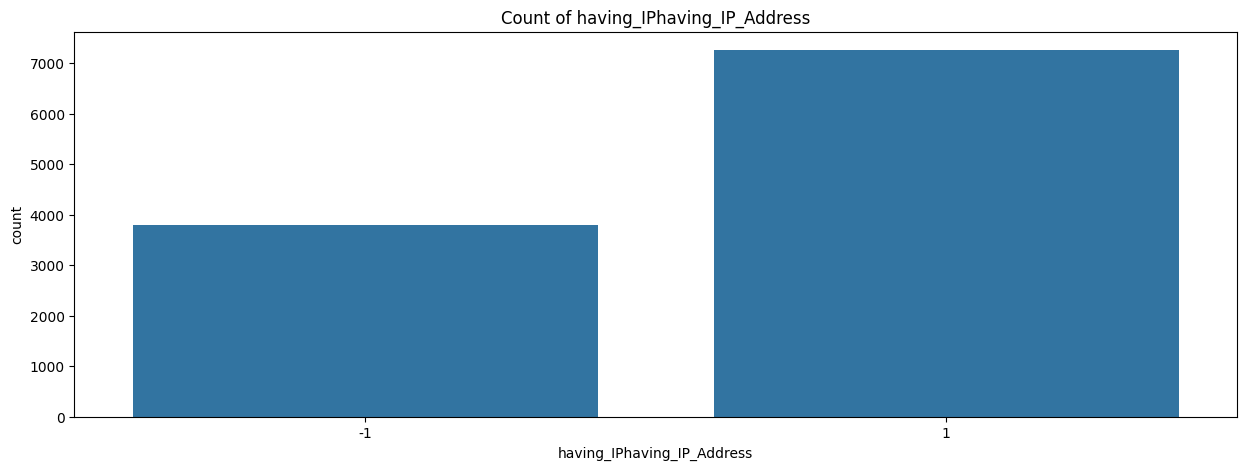

Unique elements in URLURL_Length:
[ 1  0 -1]
Number of unique elements: 3




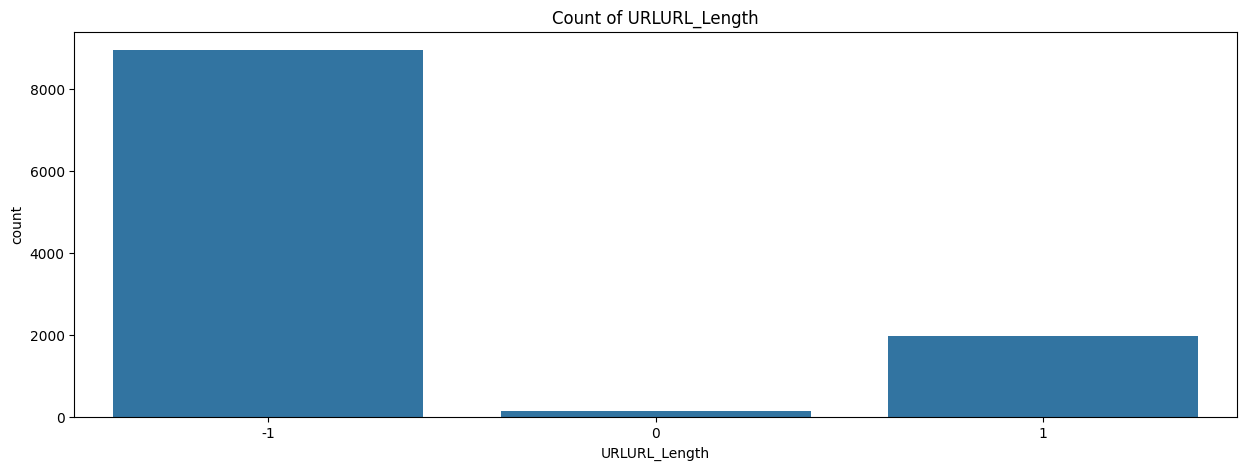

Unique elements in Shortining_Service:
[ 1 -1]
Number of unique elements: 2




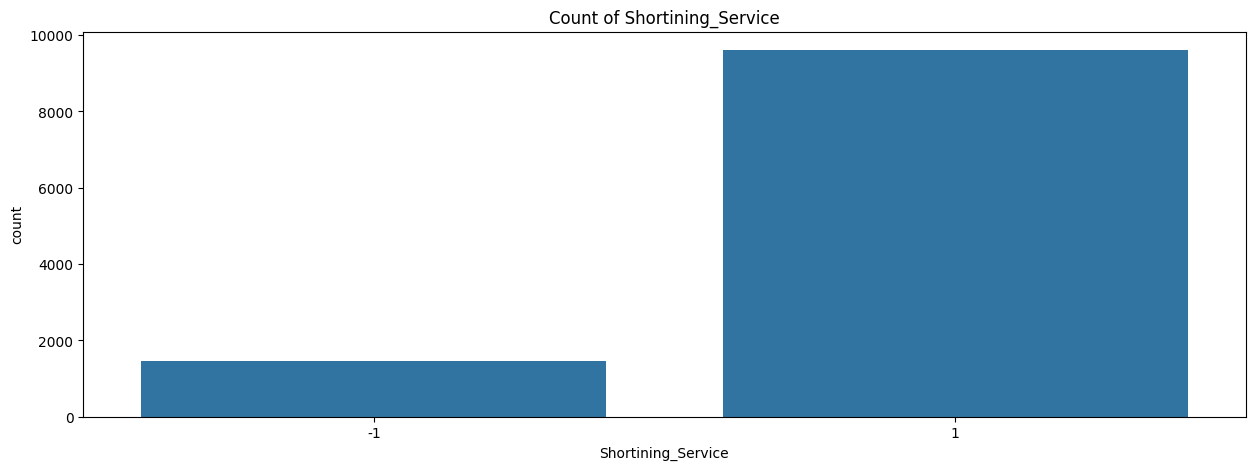

Unique elements in having_At_Symbol:
[ 1 -1]
Number of unique elements: 2




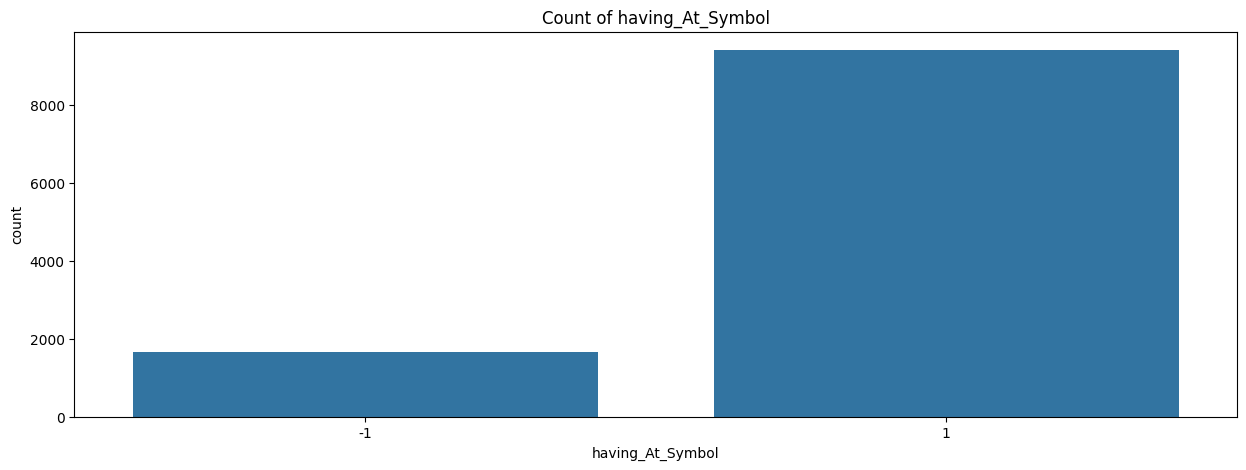

Unique elements in double_slash_redirecting:
[-1  1]
Number of unique elements: 2




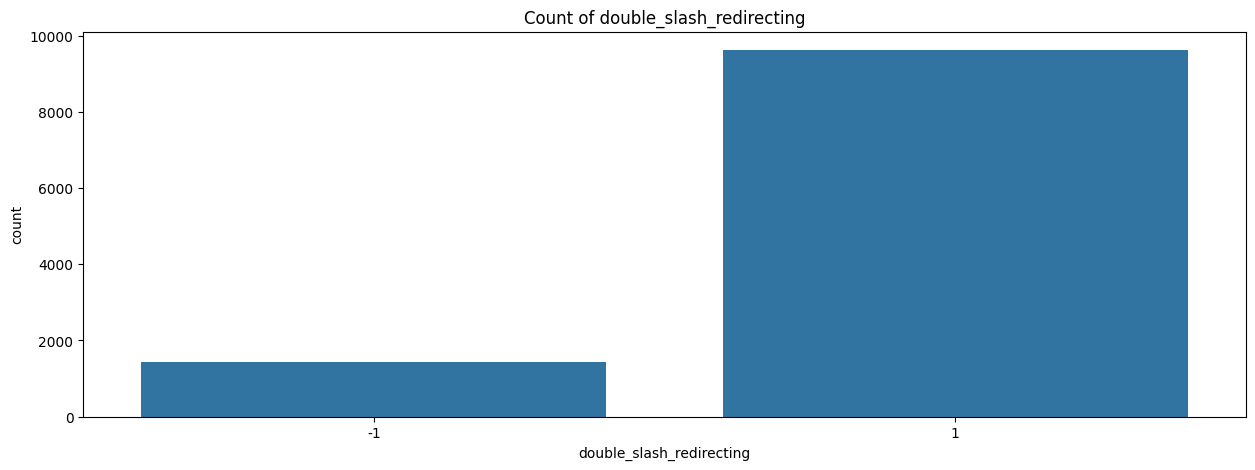

Unique elements in Prefix_Suffix:
[-1  1]
Number of unique elements: 2




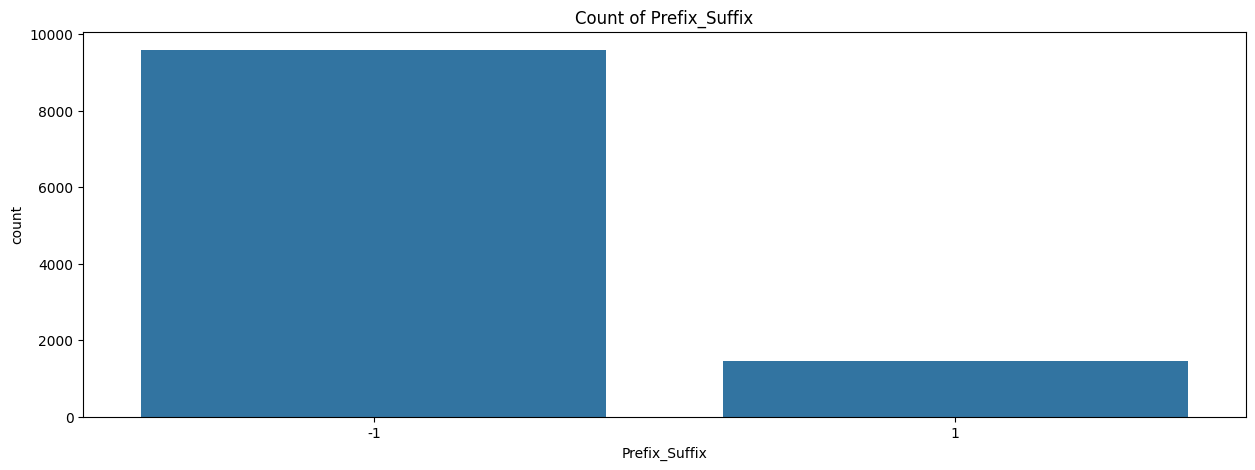

Unique elements in having_Sub_Domain:
[-1  0  1]
Number of unique elements: 3




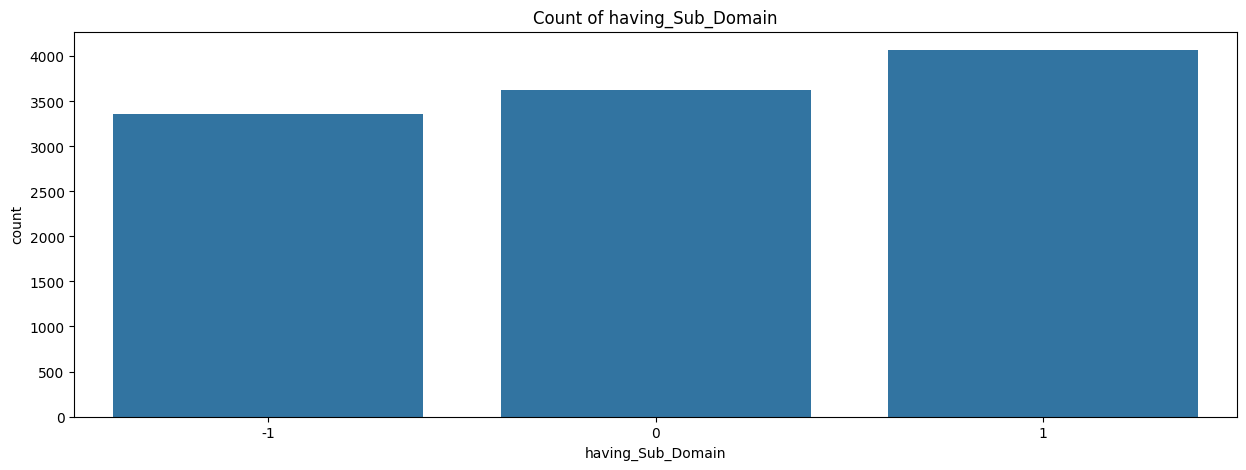

Unique elements in SSLfinal_State:
[-1  1  0]
Number of unique elements: 3




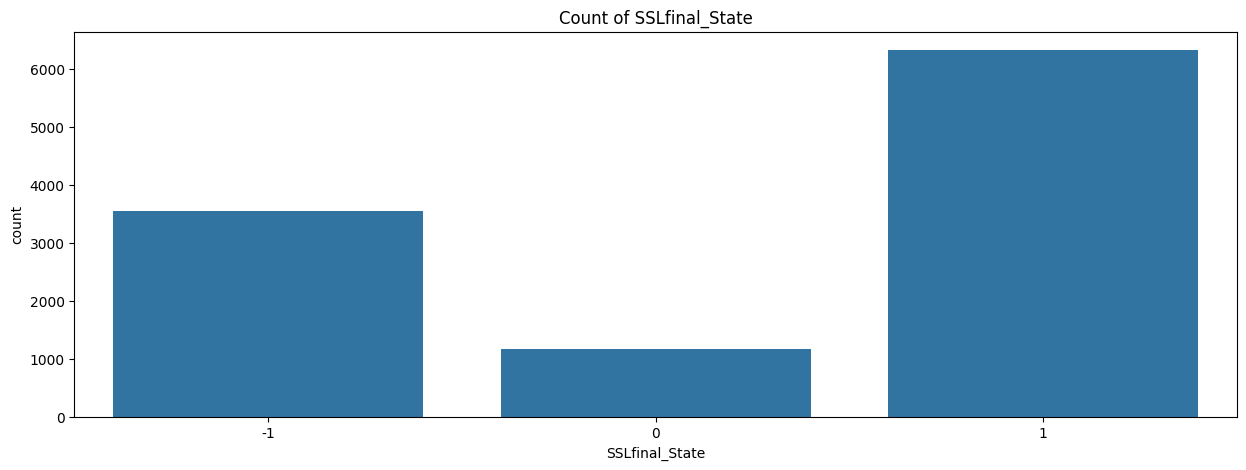

Unique elements in Domain_registeration_length:
[-1  1]
Number of unique elements: 2




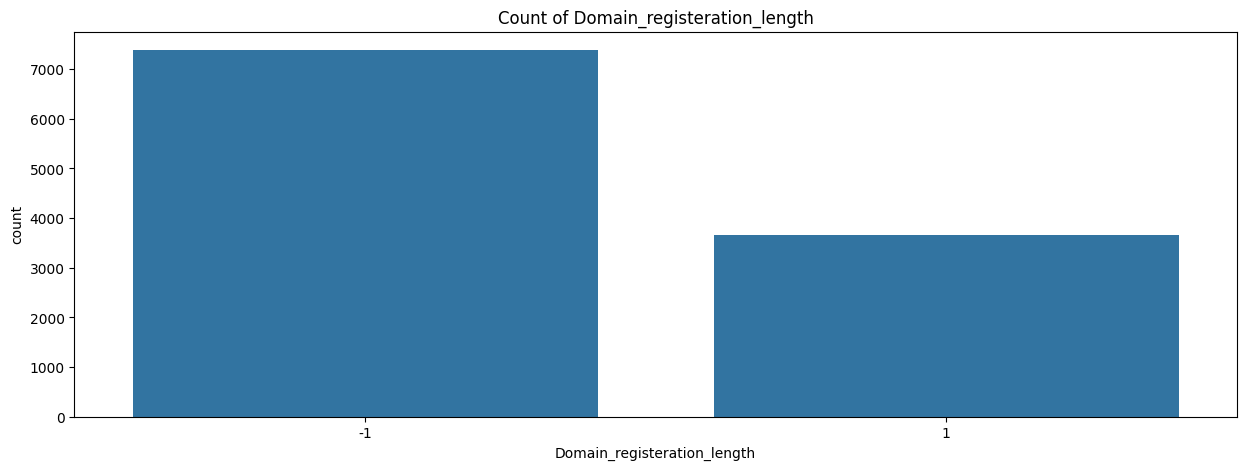

Unique elements in Favicon:
[ 1 -1]
Number of unique elements: 2




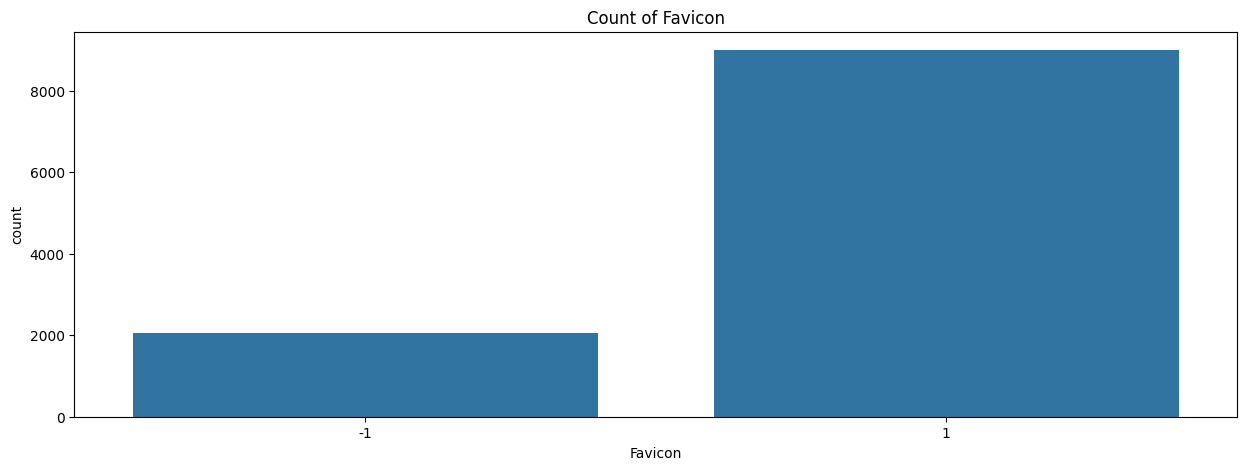

Unique elements in port:
[ 1 -1]
Number of unique elements: 2




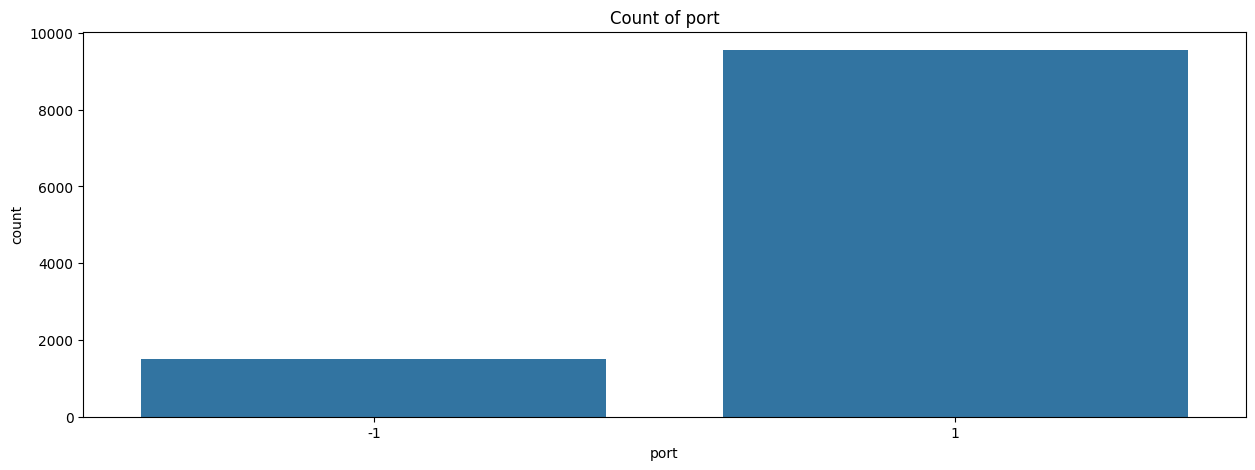

Unique elements in HTTPS_token:
[-1  1]
Number of unique elements: 2




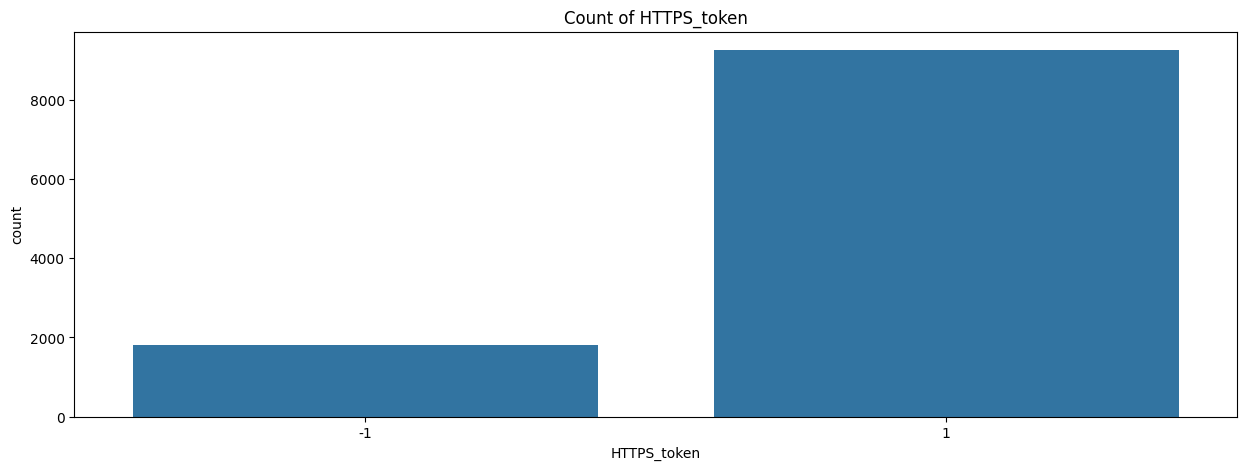

Unique elements in Request_URL:
[ 1 -1]
Number of unique elements: 2




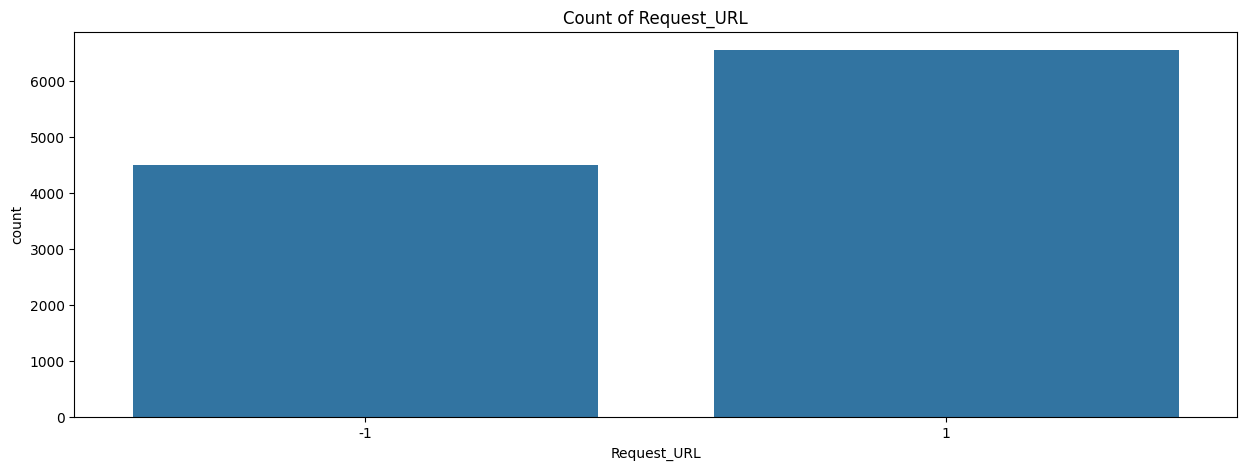

Unique elements in URL_of_Anchor:
[-1  0  1]
Number of unique elements: 3




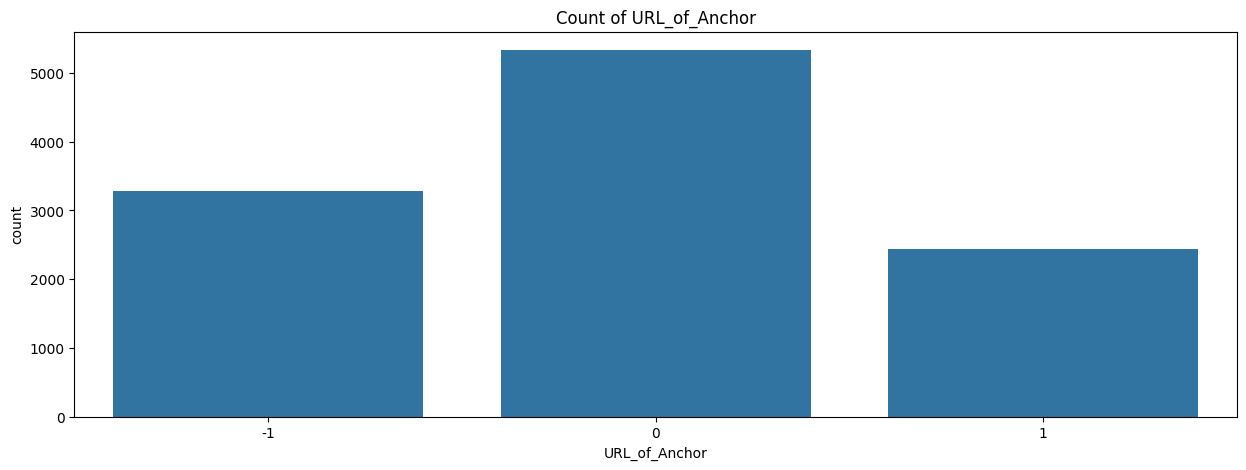

Unique elements in Links_in_tags:
[ 1 -1  0]
Number of unique elements: 3




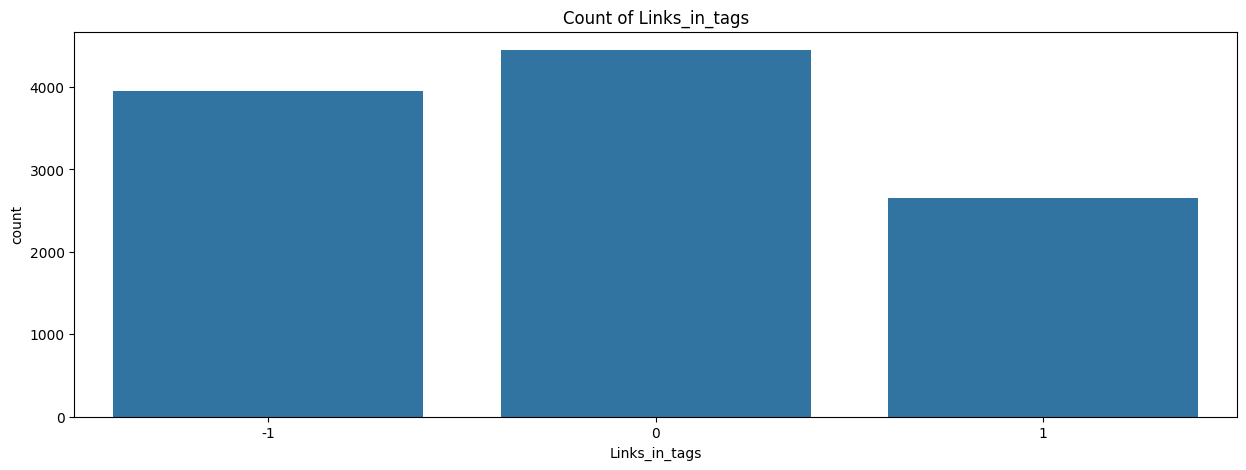

Unique elements in SFH:
[-1  1  0]
Number of unique elements: 3




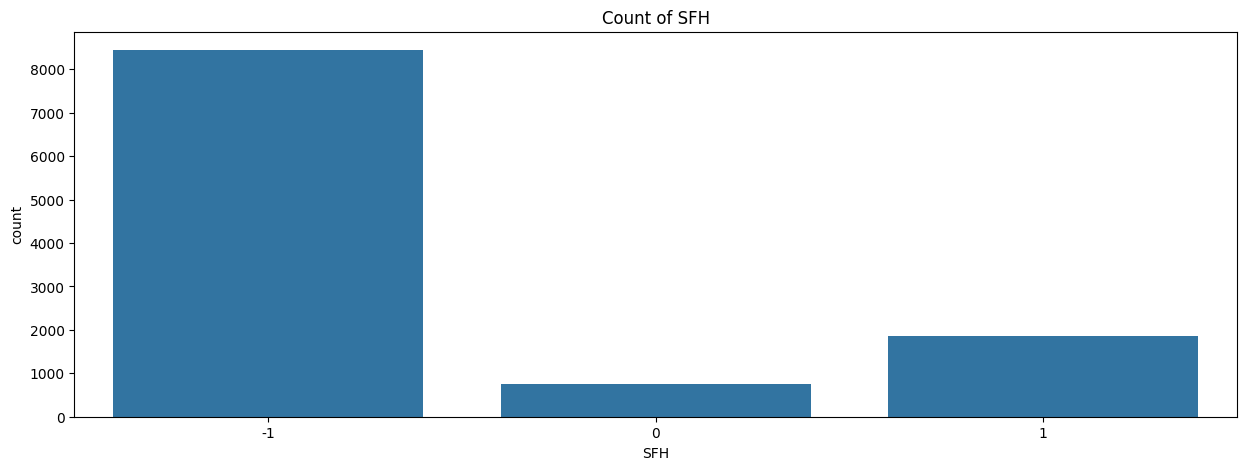

Unique elements in Submitting_to_email:
[-1  1]
Number of unique elements: 2




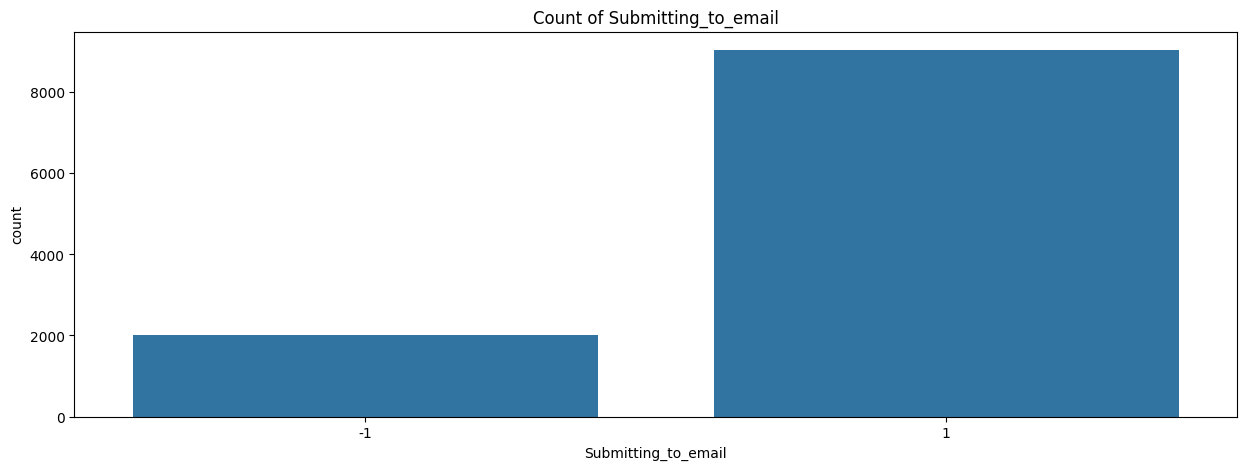

Unique elements in Abnormal_URL:
[-1  1]
Number of unique elements: 2




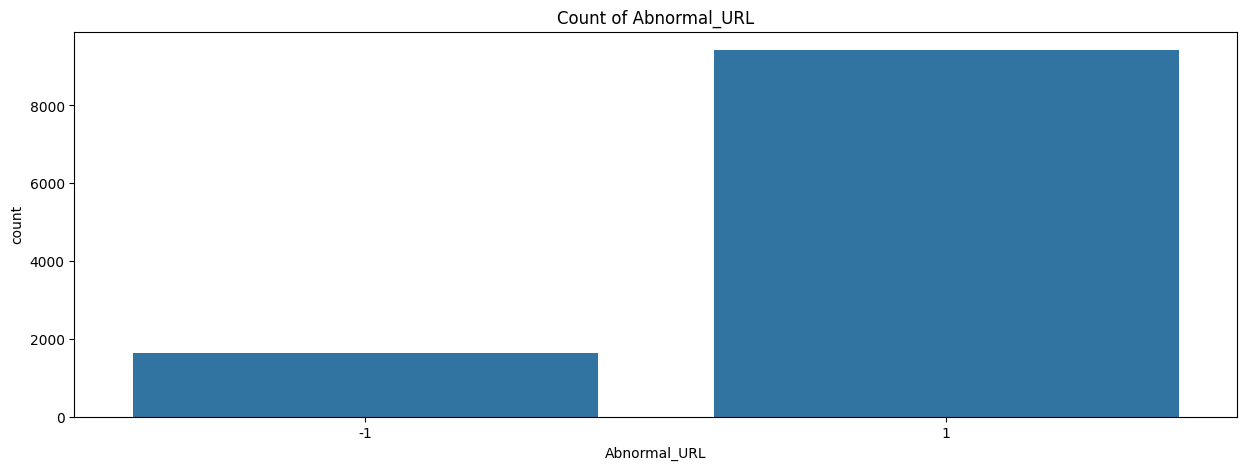

Unique elements in Redirect:
[0 1]
Number of unique elements: 2




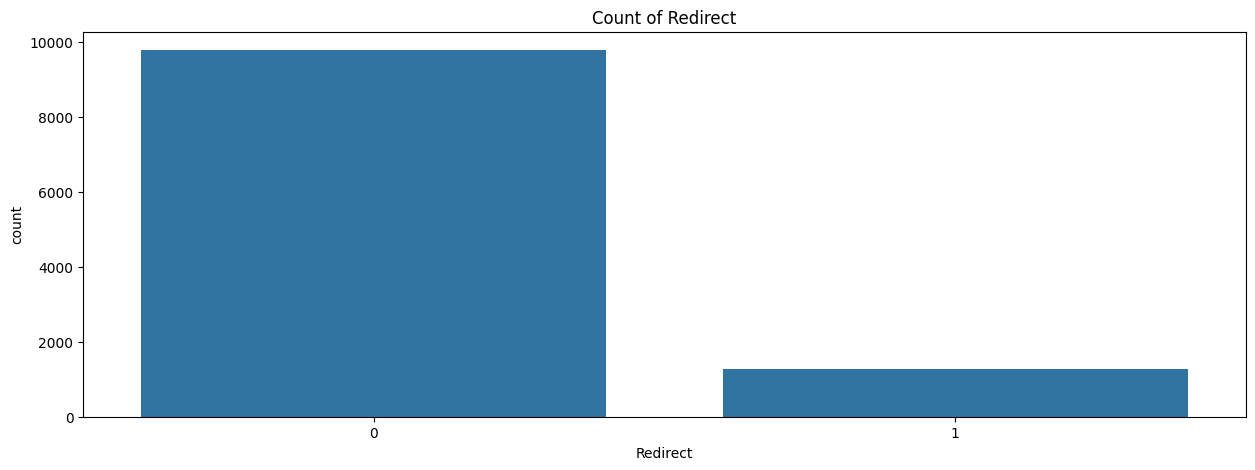

Unique elements in on_mouseover:
[ 1 -1]
Number of unique elements: 2




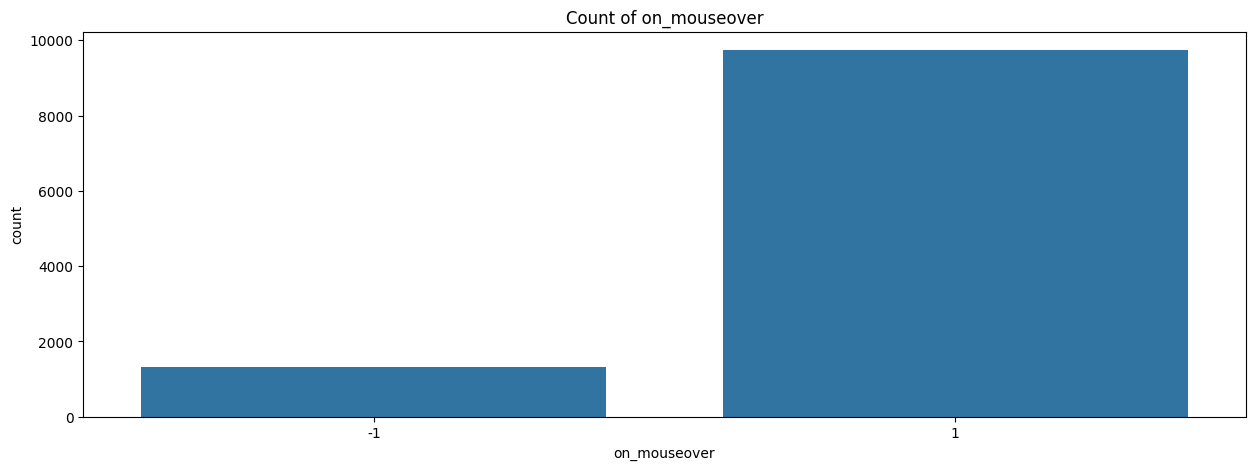

Unique elements in RightClick:
[ 1 -1]
Number of unique elements: 2




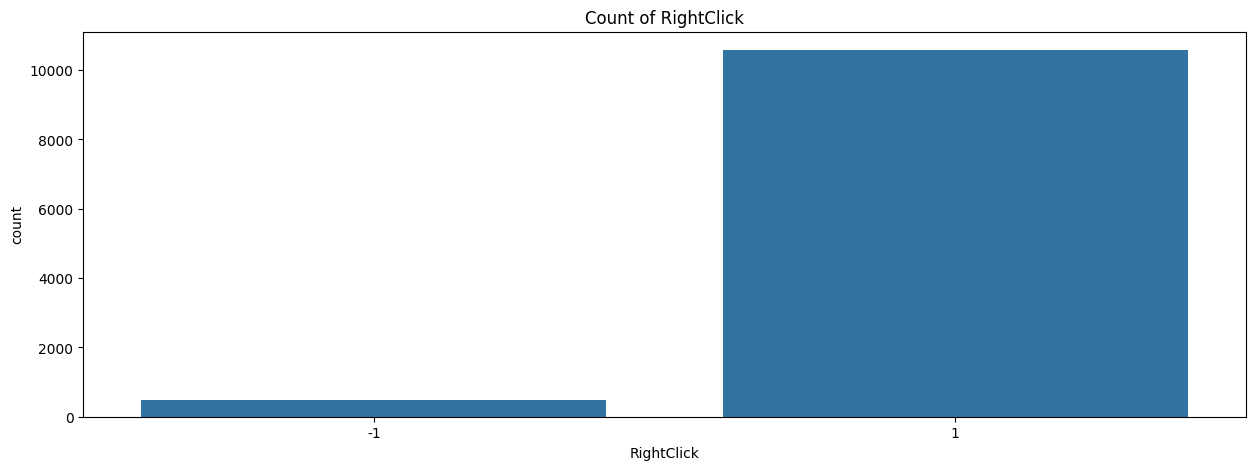

Unique elements in popUpWidnow:
[ 1 -1]
Number of unique elements: 2




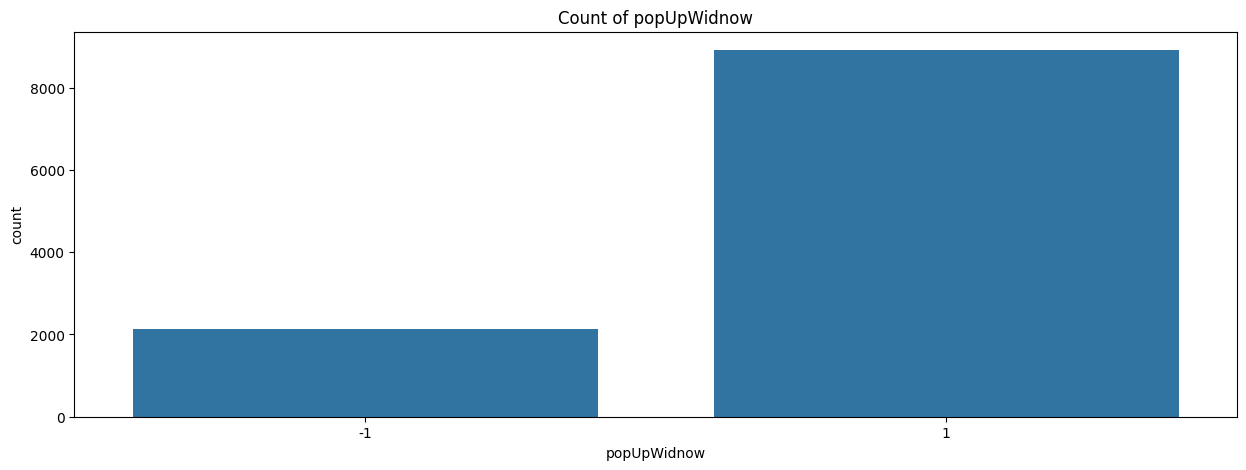

Unique elements in Iframe:
[ 1 -1]
Number of unique elements: 2




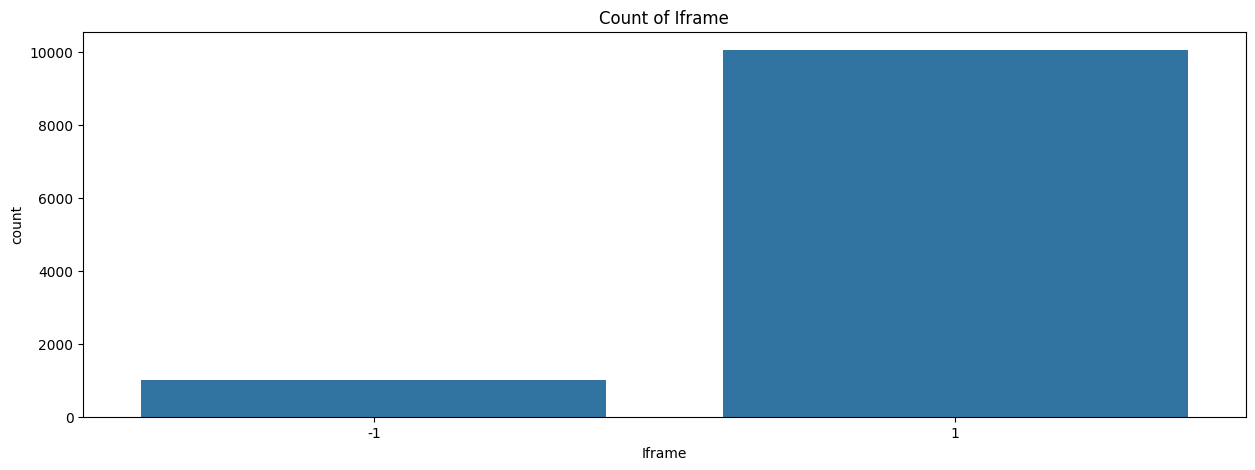

Unique elements in age_of_domain:
[-1  1]
Number of unique elements: 2




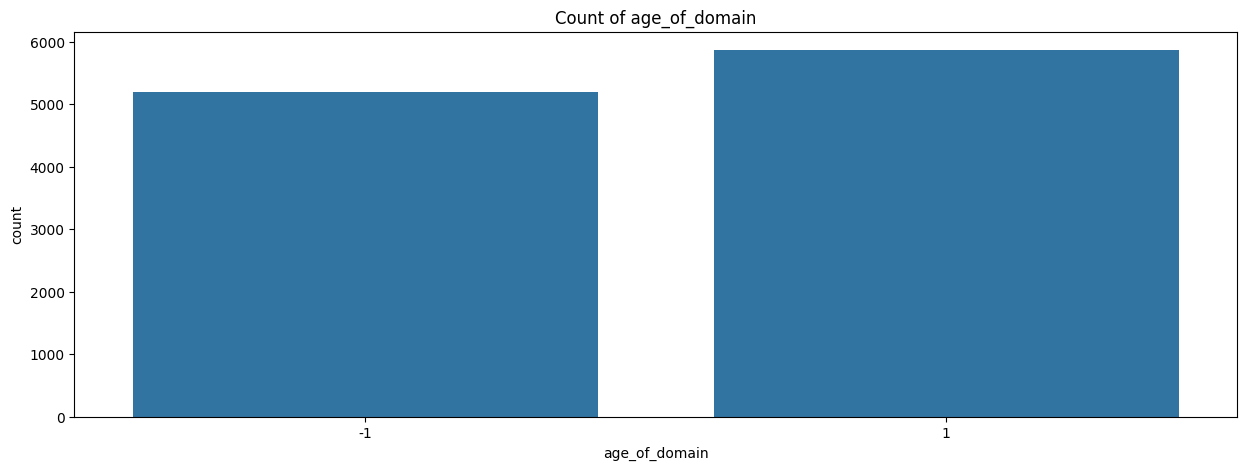

Unique elements in DNSRecord:
[-1  1]
Number of unique elements: 2




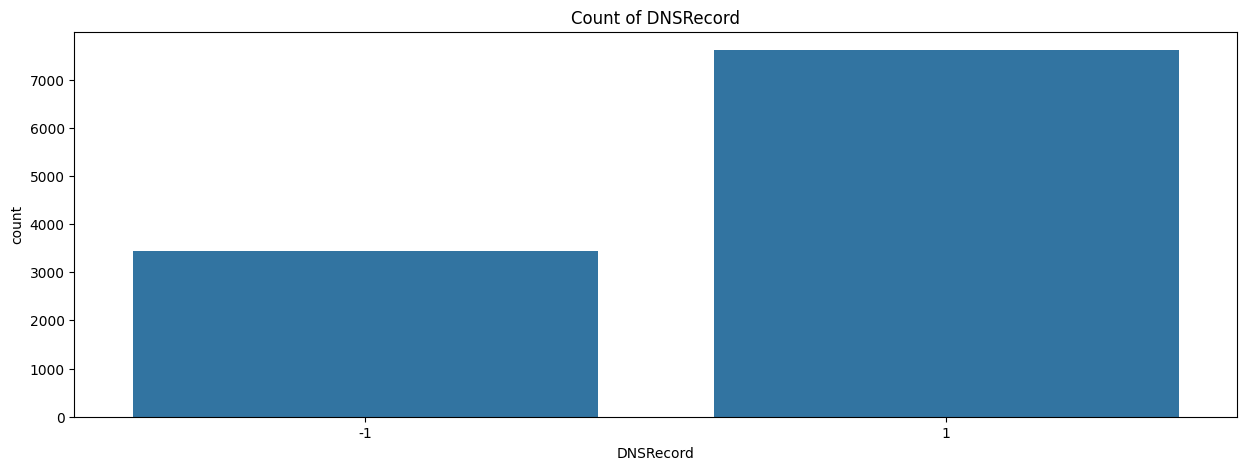

Unique elements in web_traffic:
[-1  0  1]
Number of unique elements: 3




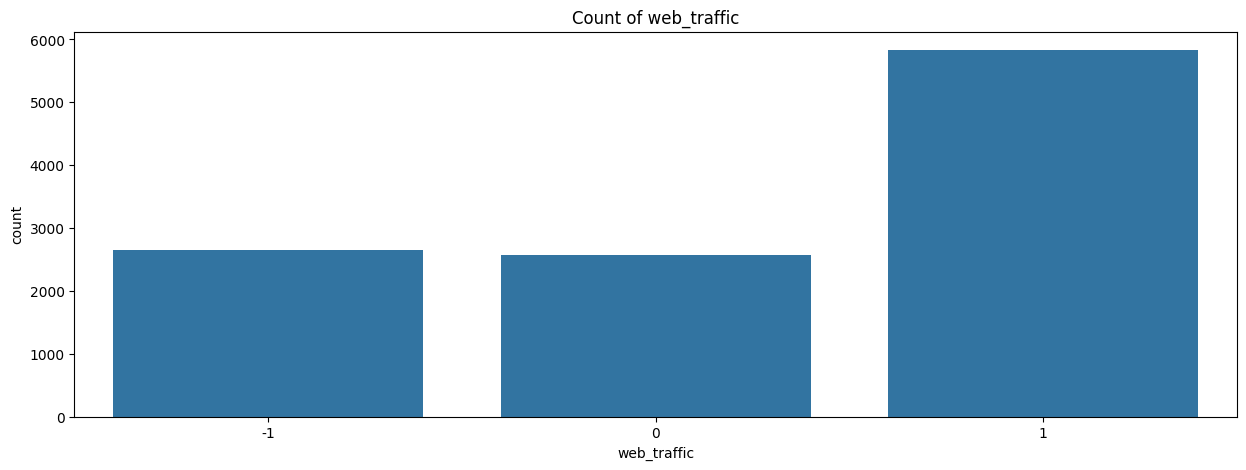

Unique elements in Page_Rank:
[-1  1]
Number of unique elements: 2




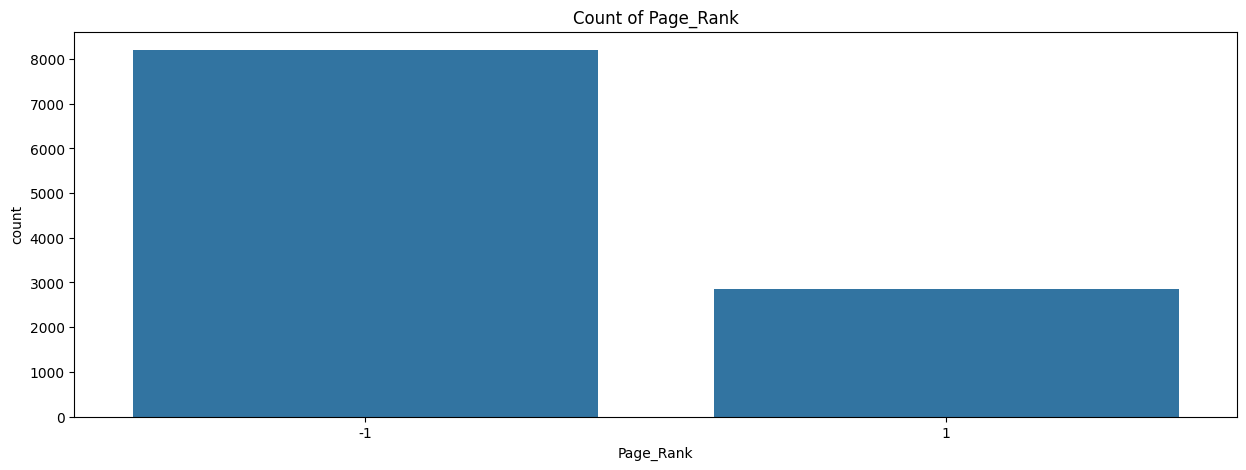

Unique elements in Google_Index:
[ 1 -1]
Number of unique elements: 2




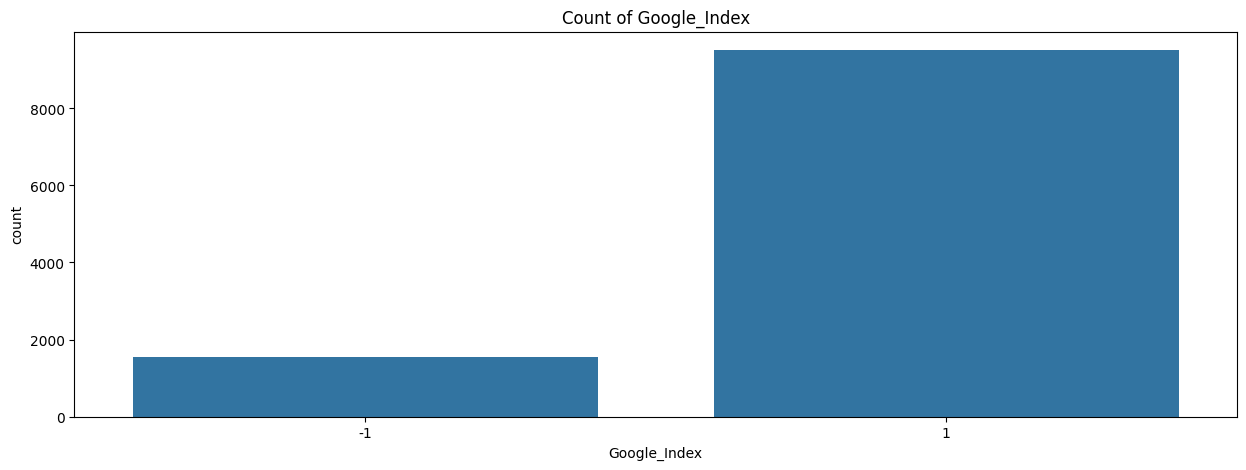

Unique elements in Links_pointing_to_page:
[ 1  0 -1]
Number of unique elements: 3




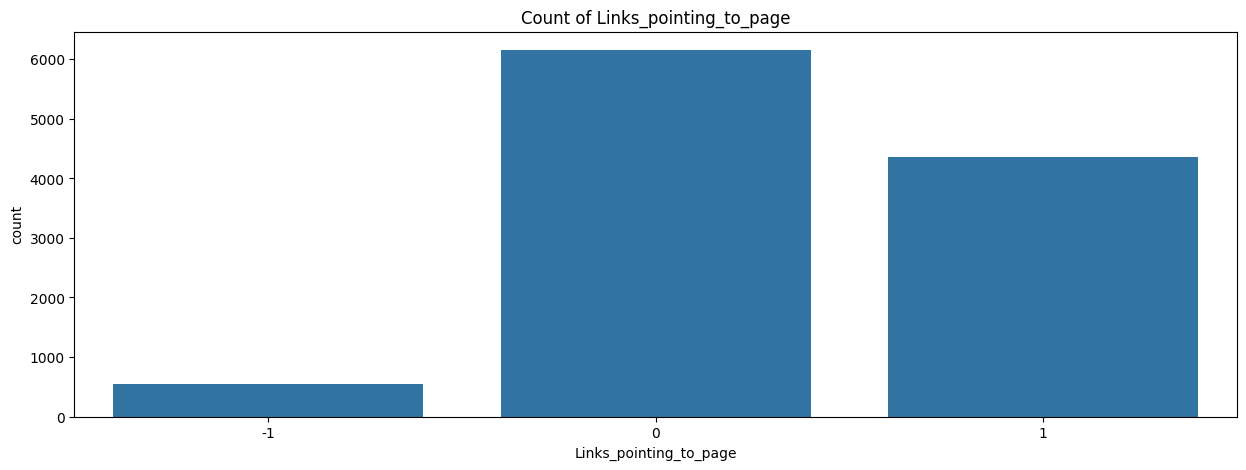

Unique elements in Statistical_report:
[-1  1]
Number of unique elements: 2




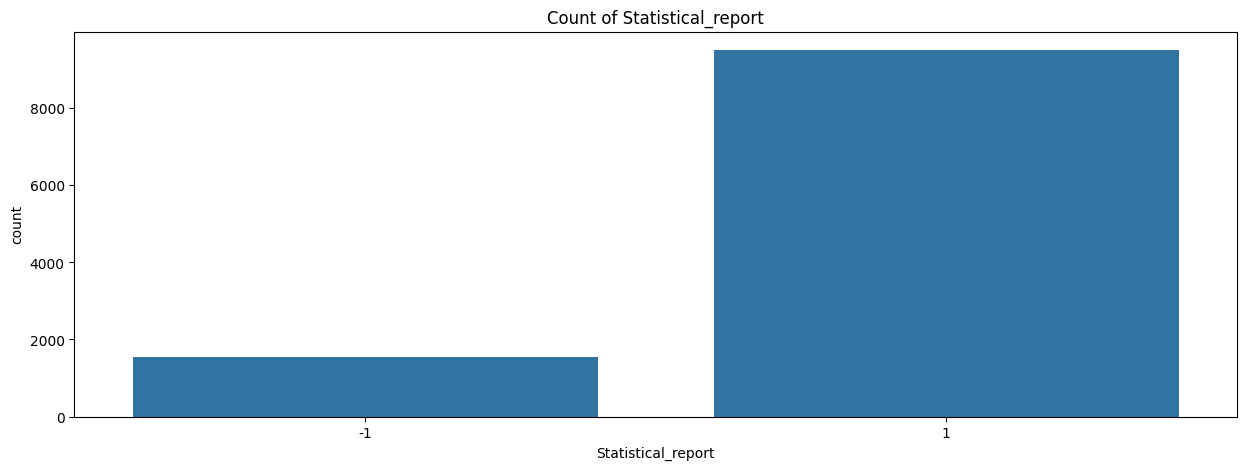

Unique elements in Result:
[-1  1]
Number of unique elements: 2




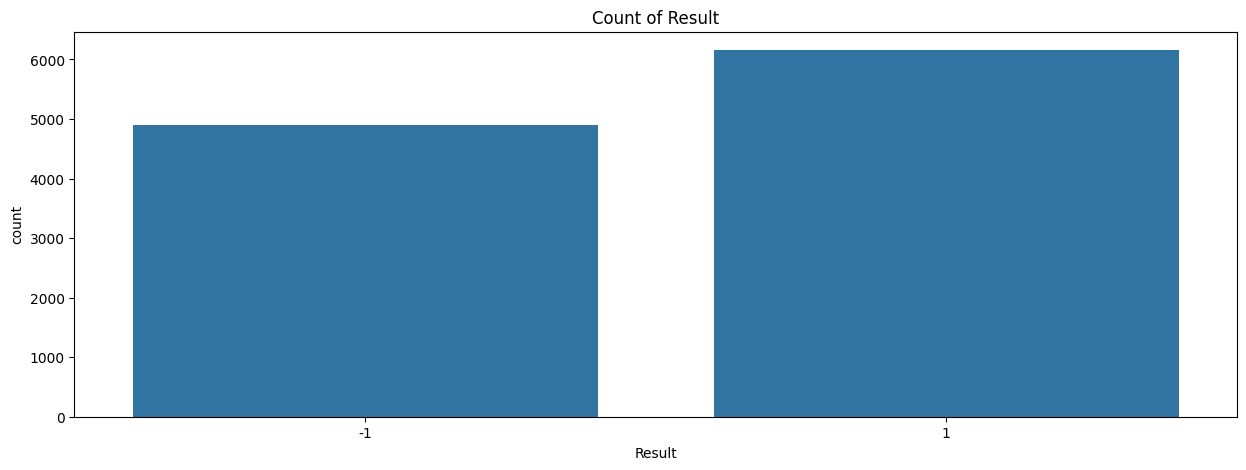

In [6]:
# Visualize the unique counts of each feature
for i in range(1, len(df.columns)):
    print(f"Unique elements in {df.columns[i]}:")
    print(df[df.columns[i]].unique())
    print(f"Number of unique elements: {len(df[df.columns[i]].unique())}")
    print("\n")
    plt.figure(figsize=(15,5))
    sns.countplot(x=df.columns[i], data=df)
    plt.title(f"Count of {df.columns[i]}")
    plt.show()


## **4. Heatmap of Feature Correlation**

The heatmap shows the correlation between features, which helps identify any multicollinearity.



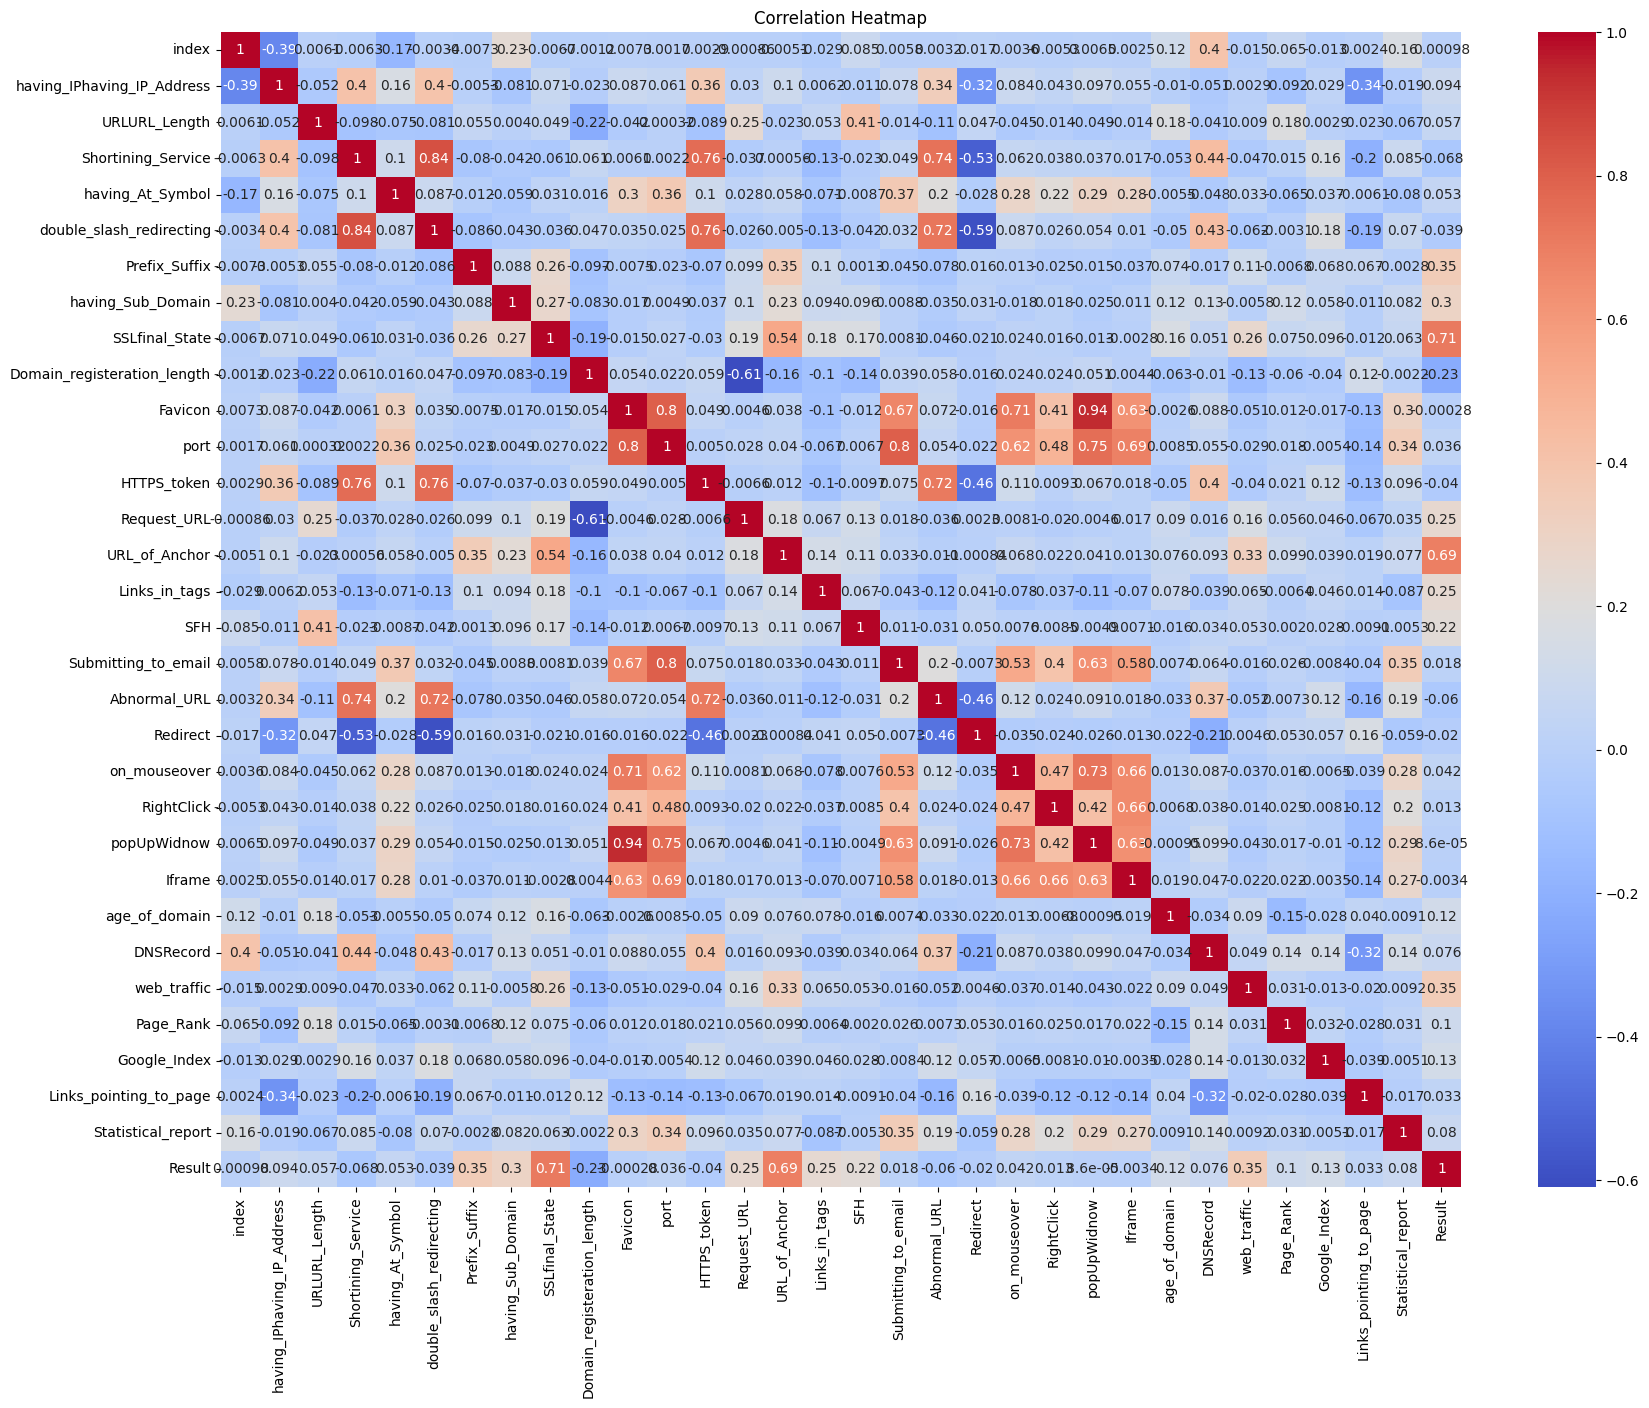

In [7]:
# Heatmap of the correlation between variables
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## **5. Removing Highly Correlated Features**

This step helps identify and filter out features that are too highly correlated (above a 0.7 threshold), which may affect the model.



In [8]:
# Define a function to find highly correlated features
def corrFilter(x: pd.DataFrame, bound: float):
    """
    Filters and returns pairs of highly correlated features 
    from the DataFrame based on a given correlation threshold.
    """
    # Compute the correlation matrix
    xCorr = x.corr()
    
    # Filter correlations by the threshold, excluding self-correlations
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr != 1.000)]
    
    # Flatten, sort, and remove duplicate pairs
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    
    return xFlattened


# Find and display highly correlated features
corrFilter(df, 0.7)


on_mouseover              Favicon                     0.706179
Result                    SSLfinal_State              0.714741
Abnormal_URL              HTTPS_token                 0.716287
double_slash_redirecting  Abnormal_URL                0.723724
on_mouseover              popUpWidnow                 0.733629
Shortining_Service        Abnormal_URL                0.739290
popUpWidnow               port                        0.748517
Shortining_Service        HTTPS_token                 0.757838
HTTPS_token               double_slash_redirecting    0.760799
port                      Submitting_to_email         0.799088
                          Favicon                     0.803834
double_slash_redirecting  Shortining_Service          0.842796
Favicon                   popUpWidnow                 0.939633
index                     index                            NaN
dtype: float64

## Features to Remove:

Looking at the features with correlations above **0.70**, here are some pairs you should consider:

### Features to Remove:

- **Remove**: `Shortining_Service` (since it has high correlations with multiple other features).
- **Remove**: `popUpWidnow` (high correlation with both `port` and `Favicon`).
- **Remove**: `HTTPS_token` (since it is highly correlated with other features like `double_slash_redirecting`).

---

These recommendations are based on reducing redundancy in the data by eliminating highly correlated features.


## **6. Feature and Target Extraction**

Here, we prepare the features (X) and target (Y) for model training.



In [9]:
# Drop the 'Index' column
df1 = df.drop(['index'], axis=1)

# Extract features and target
X = df1.drop(['Result'], axis=1)

# Defining a list of highly correlated columns to be removed
del_col_lst = ['Favicon', 'popUpWidnow', 'HTTPS_token']

# Check and remove columns only if they exist in the DataFrame
X = X.drop(columns=X.columns.intersection(del_col_lst), axis=1)

# Display the first few rows
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1


In [10]:
# Extract the 'Result' column from df1 as the target variable Y
Y = df1[['Result']]

# Remap -1 to 0 in the 'Result' column
# This remapping is done because some machine learning algorithms, such as XGBoost,
# and others expect binary class labels to be 0 and 1 for binary classification.
# By replacing -1 with 0, we make the data compatible with these algorithms.
Y['Result'] = Y['Result'].replace(-1, 0)

# Display the first few rows to verify the remapping
Y.head()

,Result
0,0
1,0
2,0
3,0
4,1


## **7. Model Selection and Evaluation**

This block of code splits the dataset and evaluates several models. It compares their performance based on accuracy, precision, recall, and F1 score.



In [11]:
# Import libraries for splitting data and machine learning models
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statistics import mean
from joblib import parallel_backend

# Listing base model algorithms and their names
base_algos = [
    LogisticRegression(),
    RidgeClassifier(),
    PassiveAggressiveClassifier(),
    GaussianNB(),
    SGDClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SVC(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    XGBClassifier(objective='binary:logistic'),
    'ANN Model'  # Placeholder for the Artificial Neural Network
]

model_names = [
    'Logistic Regression',
    'Ridge Classifier',
    'Passive Aggressive Classifier',
    'Naive Bayes',
    'SGD Classifier',
    'KNN',
    'Decision Tree',
    'Extra Tree Classifier',
    'Gradient Boosting Classifier',
    'Linear Discriminant Analysis',
    'Quadratic Discriminant Analysis',
    'Linear Support Vector Classifier',
    'Support Vector Machine',
    'Ada Boost Classifier',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost Classifier',
    'ANN Model'
]

# Define the function to build the ANN model
def build_ANN(ip_size):
    """
    Builds a simple Artificial Neural Network (ANN) model.
    
    Args:
    ip_size (int): The input size, corresponding to the number of features.
    
    Returns:
    model: A compiled Sequential model.
    """
    # Initializing the Sequential model
    model = Sequential()

    # Adding dense layers with dropout to prevent overfitting
    model.add(Dense(units=128, activation='relu', kernel_initializer='uniform', input_dim=ip_size))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compiling the model with 'adam' optimizer and binary crossentropy loss
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

    # Return the compiled ANN model
    return model

# Define the function to compare machine learning models
def compare_models(X, Y, base_algos, model_names, del_col_lst = [], num_splits=10):
    """
    Compares different machine learning models using K-Fold cross-validation and evaluates their performance on a test set.
    
    Args:
    X (pd.DataFrame): The feature matrix.
    Y (pd.Series or np.array): The target variable array.
    del_col_lst (list): List of columns to remove (usually highly correlated features).
    base_algos (list): List of machine learning algorithms to compare.
    model_names (list): List of model names corresponding to the algorithms.
    num_splits (int, optional): Number of splits for K-Fold cross-validation. Default is 10.
    
    Returns:
    pd.DataFrame: A sorted DataFrame containing the evaluation metrics (cross-validation score, test accuracy, precision, recall, F1 score) for each model.
    """
    # Step 1: Data preprocessing - Remove specified columns (with high correlation) and convert data to arrays
    X = X.drop(del_col_lst, axis=1)  # Drop highly correlated columns
    X = np.array(X)  # Convert DataFrame to NumPy array
    Y = np.array(Y)  # Convert target variable Y to NumPy array

    # Step 2: Define the K-Fold cross-validation object (default 10 splits)
    cv_folds = KFold(n_splits=num_splits, shuffle=False)
    
    # Step 3: Split data into training and testing sets (80% train, 20% test)
    # Stratified split ensures proportional representation of classes in both sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)
    
    # Step 4: Initialize lists to store evaluation metrics for each model
    cv_score = []  # Cross-validation scores
    test_accuracy = []  # Test set accuracy
    test_precision_Phishing = []  # Precision for phishing class
    test_recall_Phishing = []  # Recall for phishing class
    f1_score_Phishing = []  # F1 score for phishing class
    test_precision_legit = []  # Precision for legit class
    test_recall_legit = []  # Recall for legit class
    f1_score_legit = []  # F1 score for legit class
    
    print("START...")  # Indicate the start of model comparison
    
    # Step 5: Iterate over each algorithm in the base_algos list
    for algo in base_algos:
        
        print("Running : ", algo)  # Output the current algorithm being run
        
        model = algo  # Initialize the current model
        
        # Check if the model is an Artificial Neural Network (ANN Model)
        if model == 'ANN Model':
            
            # Wrap the Keras ANN model to make it compatible with scikit-learn
            model = KerasClassifier(build_fn=build_ANN,  # ANN model function
                                    ip_size=x_train.shape[1],  # Input size (number of features)
                                    epochs=15,  # Number of epochs
                                    batch_size=100,  # Batch size
                                    verbose=0)  # Silence verbose output
            
            # Perform cross-validation for ANN and calculate mean score
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv_folds)
            mean_score = mean(scores)  # Calculate mean cross-validation score
            cv_score.append(mean_score)  # Store cross-validation score
            
            # Fit the ANN model to the training data
            model.fit(x_train, y_train)

        else:
            # Perform cross-validation for other models (with threading for parallel processing)
            with parallel_backend('threading'):  # Use threading to avoid serialization issues
                scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv_folds, n_jobs=-1)
            mean_score = mean(scores)  # Calculate mean cross-validation score
            cv_score.append(mean_score)  # Store cross-validation score
            
            # Fit the model to the training data
            model.fit(x_train, y_train)
        
        # Step 6: Make predictions on the test set
        predictions = model.predict(x_test)
        
        # Step 7: Calculate test accuracy and class-specific metrics (phishing and legit)
        test_accuracy.append(accuracy_score(y_test, predictions))  # Overall test accuracy
        
        # Metrics for phishing class (class 0)
        test_precision_Phishing.append(precision_score(y_test, predictions, average=None)[0])
        test_recall_Phishing.append(recall_score(y_test, predictions, average=None)[0])
        f1_score_Phishing.append(f1_score(y_test, predictions, average=None)[0])
        
        # Metrics for legit class (class 1)
        test_precision_legit.append(precision_score(y_test, predictions, average=None)[1])
        test_recall_legit.append(recall_score(y_test, predictions, average=None)[1])
        f1_score_legit.append(f1_score(y_test, predictions, average=None)[1])
    
    # Step 8: Create a DataFrame to store all evaluation metrics for each model
    df_eval = pd.DataFrame({
        'Model': model_names,  # Model names
        'CV Score': cv_score,  # Cross-validation scores
        'Test Accuracy': test_accuracy,  # Test set accuracy
        "Test Precision (Phishing)": test_precision_Phishing,  # Precision for phishing class
        "Test Recall (Phishing)": test_recall_Phishing,  # Recall for phishing class
        "Test F1 Score (Phishing)": f1_score_Phishing,  # F1 score for phishing class
        "Test Precision (legit)": test_precision_legit,  # Precision for legit class
        "Test Recall (legit)": test_recall_legit,  # Recall for legit class
        "Test F1 Score (legit)": f1_score_legit  # F1 score for legit class
    })

    # Sort the DataFrame by test accuracy in descending order for easy comparison
    df_eval_sorted = df_eval.sort_values(by='Test Accuracy', ascending=False)

    print("COMPLETED...!")  # Indicate the completion of model comparison
    
    # Step 9: Return the sorted DataFrame containing model evaluation metrics
    return df_eval_sorted

In [12]:
# Perform model comparison and store results
df_eval = compare_models(X, Y, base_algos, model_names)

# Print the evaluation results
df_eval

START...
Running :  LogisticRegression()
Running :  RidgeClassifier()
Running :  PassiveAggressiveClassifier()
Running :  GaussianNB()
Running :  SGDClassifier()
Running :  KNeighborsClassifier()
Running :  DecisionTreeClassifier()
Running :  ExtraTreeClassifier()
Running :  GradientBoostingClassifier()
Running :  LinearDiscriminantAnalysis()
Running :  QuadraticDiscriminantAnalysis()
Running :  LinearSVC()
Running :  SVC()
Running :  AdaBoostClassifier()
Running :  BaggingClassifier()
Running :  RandomForestClassifier()
Running :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, ma

,Model,CV Score,Test Accuracy,Test Precision (Phishing),Test Recall (Phishing),Test F1 Score (Phishing),Test Precision (legit),Test Recall (legit),Test F1 Score (legit)
16,XGBoost Classifier,0.967888,0.971506,0.981112,0.954082,0.967408,0.964229,0.985378,0.974689
15,Random Forest,0.968227,0.970602,0.981073,0.952041,0.966339,0.962698,0.985378,0.973906
14,Bagging Classifier,0.964834,0.966531,0.967975,0.956122,0.962012,0.965406,0.974817,0.970089
6,Decision Tree,0.959181,0.964722,0.967842,0.952041,0.959877,0.962310,0.974817,0.968523
17,ANN Model,0.953527,0.952510,0.958115,0.933673,0.945736,0.948248,0.967506,0.957780
7,Extra Tree Classifier,0.951831,0.947987,0.948187,0.933673,0.940874,0.947833,0.959383,0.953573
8,Gradient Boosting Classifier,0.947423,0.947987,0.953830,0.927551,0.940507,0.943561,0.964257,0.953797
12,Support Vector Machine,0.946970,0.945726,0.954545,0.921429,0.937695,0.939130,0.965069,0.951923
5,KNN,0.941092,0.943464,0.944849,0.926531,0.935600,0.942400,0.956946,0.949617
13,Ada Boost Classifier,0.937019,0.933514,0.937041,0.911224,0.923952,0.930843,0.951259,0.940940


####################################################################################################

Model: QuadraticDiscriminantAnalysis


TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      3918
           1       1.00      0.24      0.38      4926

    accuracy                           0.57      8844
   macro avg       0.76      0.62      0.53      8844
weighted avg       0.78      0.57      0.51      8844



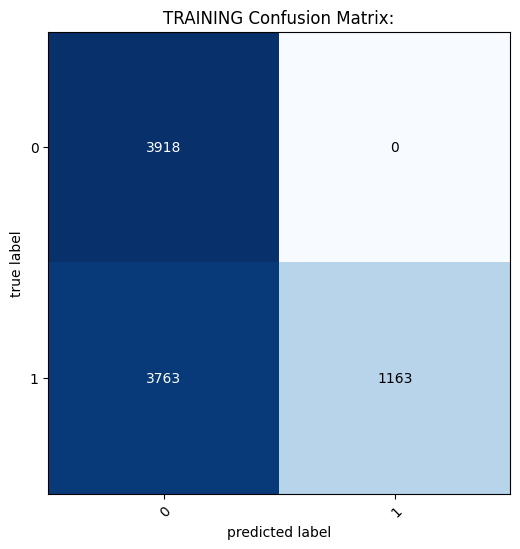

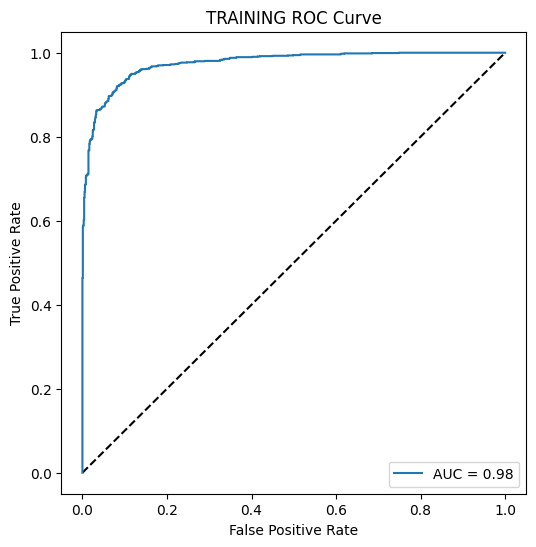


TESTING REPORT:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       980
           1       1.00      0.25      0.39      1231

    accuracy                           0.58      2211
   macro avg       0.76      0.62      0.54      2211
weighted avg       0.78      0.58      0.52      2211



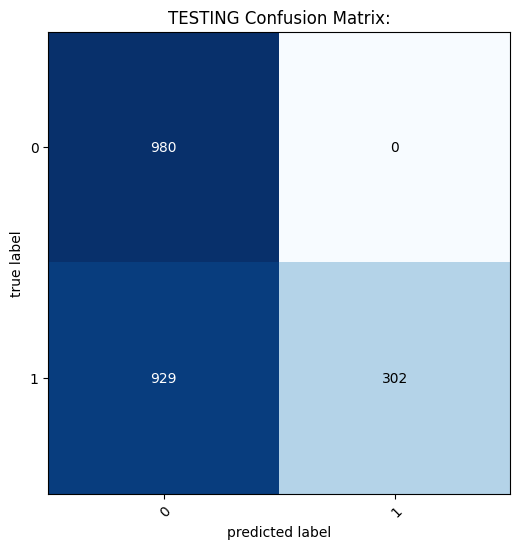

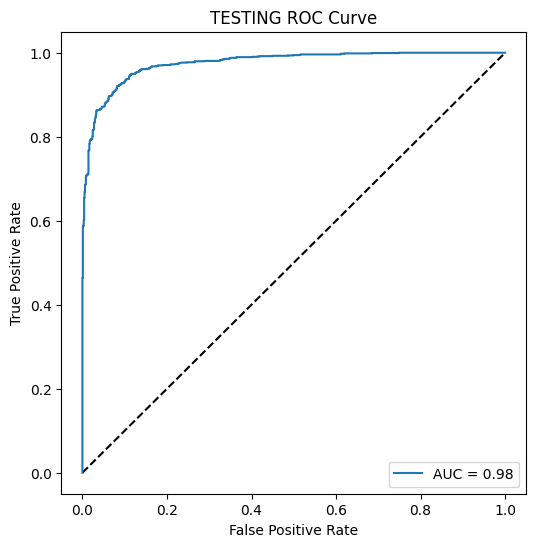

####################################################################################################
####################################################################################################

Model: BaggingClassifier


TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



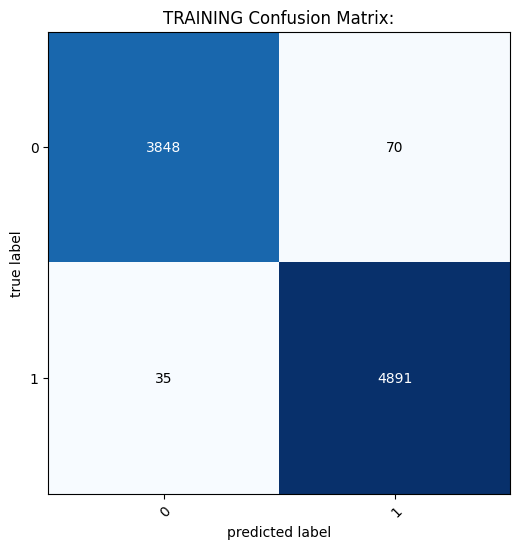

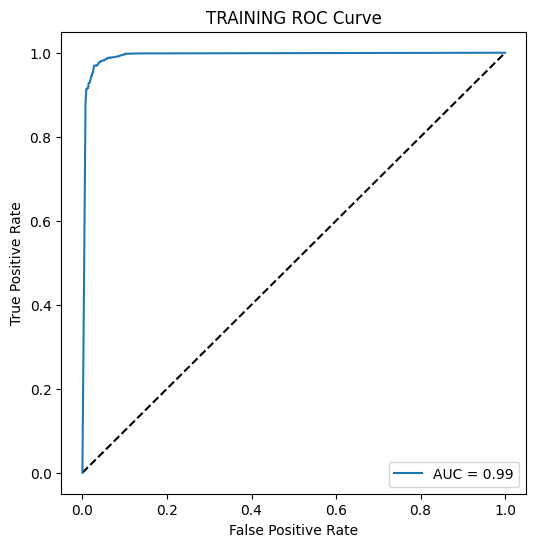


TESTING REPORT:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



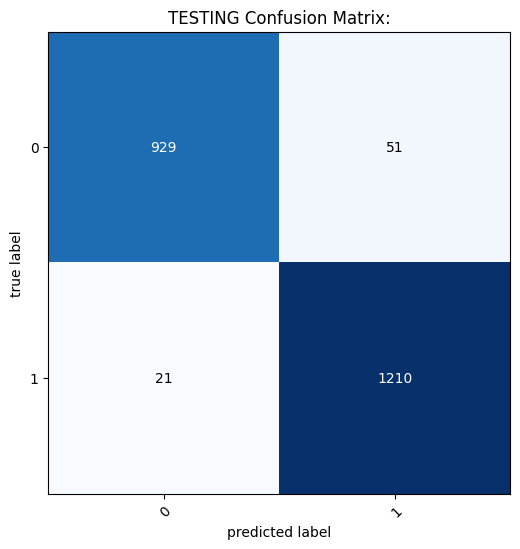

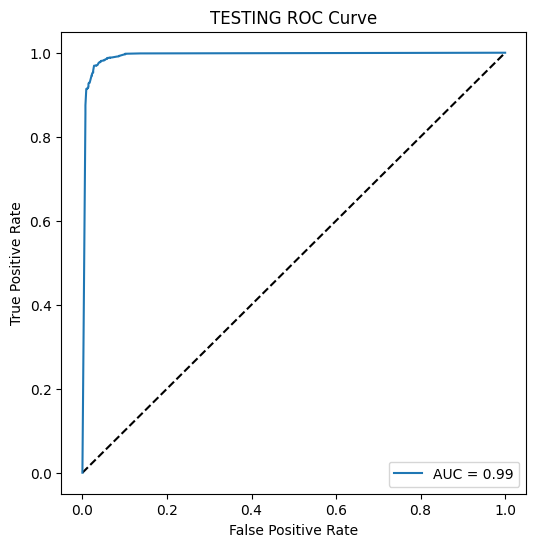

####################################################################################################
####################################################################################################

Model: RandomForestClassifier


TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



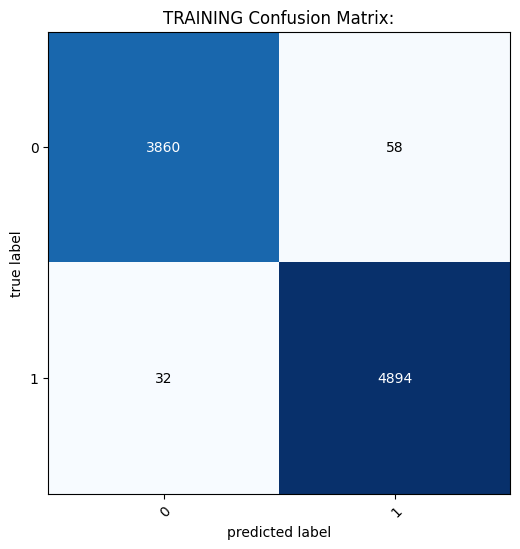

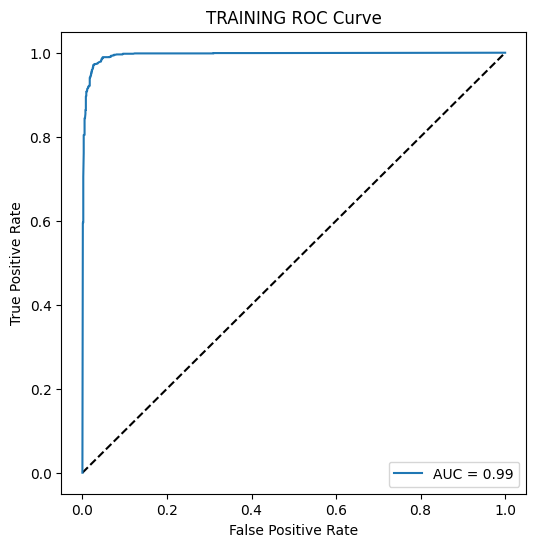


TESTING REPORT:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



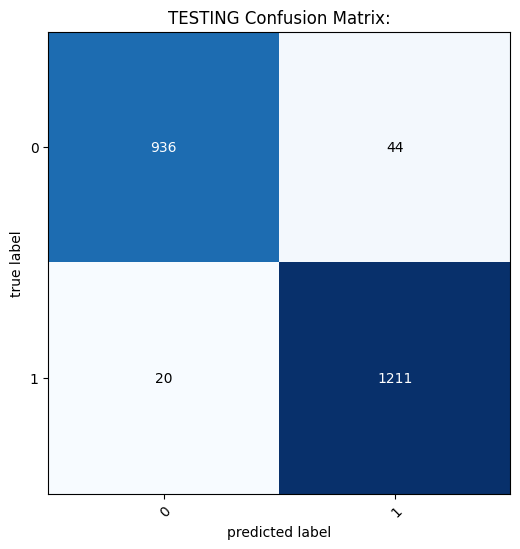

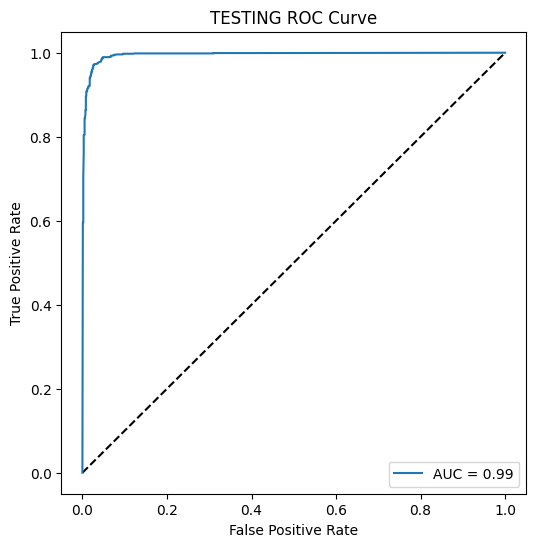

####################################################################################################
####################################################################################################

Model: XGBClassifier


TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3918
           1       0.98      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



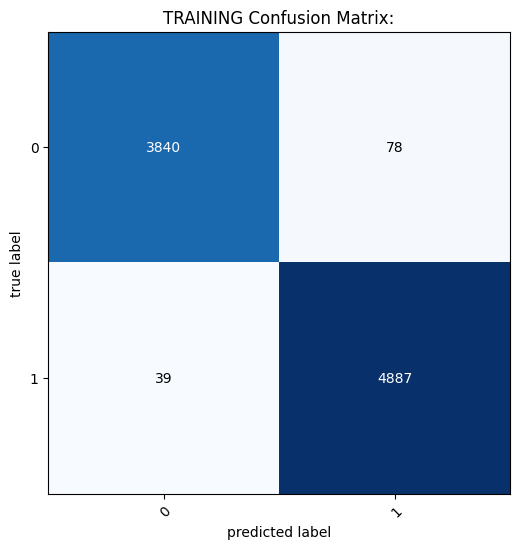

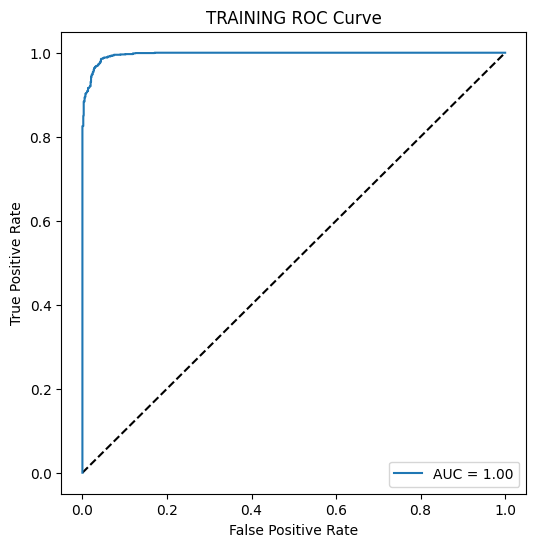


TESTING REPORT:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       980
           1       0.96      0.99      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



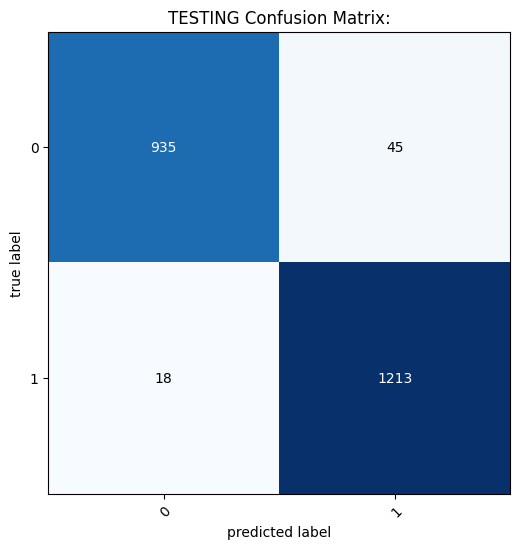

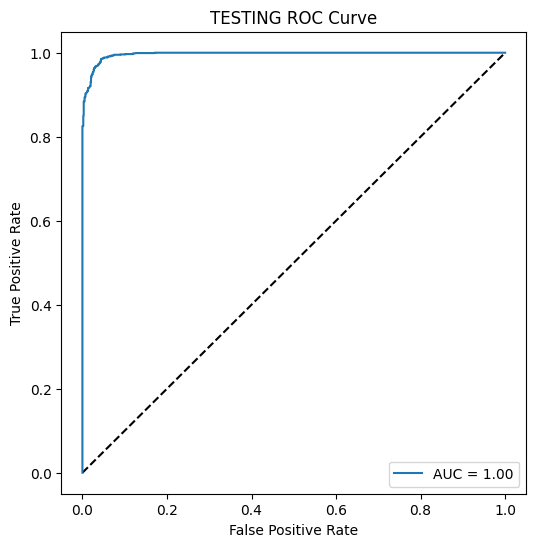

####################################################################################################


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

# Function to generate report and confusion matrix
def generate_report(y_true, y_pred, x_test, y_test, dataset_type, model, class_labels):
    """
    Generates a classification report, confusion matrix, and ROC curve for the provided predictions.
    
    Args:
    y_true (array-like): True class labels.
    y_pred (array-like): Predicted class labels.
    x_test (array-like): Test features for ROC curve.
    y_test (array-like): Test true labels for ROC curve.
    dataset_type (str): Specifies whether the report is for 'TRAINING' or 'TESTING' data.
    model (object): Trained machine learning model.
    class_labels (list): List of class names (e.g., [0, 1] for binary classification).
    
    This function:
    - Prints a classification report (precision, recall, F1-score, support).
    - Displays a confusion matrix for the provided true and predicted labels.
    - Plots the ROC curve and calculates the AUC for the given dataset (TRAINING or TESTING).
    
    The ROC curve requires the model to output probabilities for proper plotting.
    
    Returns:
    None. The function prints reports and displays plots.
    """
    
    # Print classification report
    print(f"\n{dataset_type} REPORT:")
    print(classification_report(y_true, y_pred))  # Outputs precision, recall, F1-score, and support for each class

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)  # Compute the confusion matrix from true and predicted labels
    plot_confusion_matrix(cm, figsize=(8, 6), class_names=class_labels)  # Plot the confusion matrix with given labels
    plt.title(f"{dataset_type} Confusion Matrix:")  # Title for confusion matrix plot
    plt.show()  # Display the plot

    # Plot ROC curve - Requires probabilities for correct plotting
    if hasattr(model, "predict_proba"):  # Check if the model has the predict_proba method (common for many classifiers)
        y_proba = model.predict_proba(x_test)[:, 1]  # Use predict_proba to get the probabilities for class 1
    else:  # For models without predict_proba, use decision_function (used by SVMs)
        y_proba = model.decision_function(x_test)

    # Calculate false positive rate (fpr) and true positive rate (tpr) for ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Plot the ROC curve
    plt.figure(figsize=(6, 6))  # Set figure size for the plot
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal (random classifier baseline)
    plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):0.2f}")  # Plot ROC curve and display AUC score
    plt.xlabel("False Positive Rate")  # X-axis label
    plt.ylabel("True Positive Rate")  # Y-axis label
    plt.title(f'{dataset_type} ROC Curve')  # Title for ROC curve plot
    plt.legend(loc="lower right")  # Position the legend
    plt.show()  # Display the ROC curve


# Define a function to evaluate and visualize the model performance
def get_report(X, Y, model):
    """
    Evaluates a machine learning model and generates a classification report, confusion matrix, and ROC curve.
    
    Args:
    X (array-like): Feature matrix.
    Y (array-like): Target vector.
    model (object): The machine learning model to be trained and evaluated.
    
    This function:
    - Trains the provided model on the training data.
    - Makes predictions on both training and test datasets.
    - Generates and prints a classification report (precision, recall, F1-score, support).
    - Displays a confusion matrix for both training and test datasets.
    - Plots the ROC curve and calculates the AUC for both training and test datasets.
    
    Returns:
    None. (The function prints reports and displays plots for evaluation.)
    """
    
    X = X.values
    Y = Y.values

    # Define class labels (0 for phishing, 1 for legit)
    class_labels = [0, 1]

    # Split the data into training and testing sets (80/20 split)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions for both training and testing data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Generate reports for both training and testing datasets
    generate_report(y_train, y_pred_train, x_test, y_test, "TRAINING", model, class_labels)
    generate_report(y_test, y_pred_test, x_test, y_test, "TESTING", model, class_labels)


# List of models to be evaluated
check_models = [
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]

# Iterate over each model and generate evaluation reports
for model in check_models:
    print("#" * 100)
    print(f"\nModel: {model.__class__.__name__}\n")
    
    # Print model evaluation reports
    get_report(X, Y, model)
    print("#" * 100)


## **8. Hyperparameter Tuning**

In [14]:
# Importing necessary libraries for hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint

# Defining XGBoost model
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

# Look at parameters used by our current XGBoost model
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 10,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


In [15]:
# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)

# Hyperparameter grid for XGBoost
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [int(x) for x in np.linspace(3, 15, num=6)],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 1, 10],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Print the parameter grid
print('Random grid:\n')
pprint(random_grid)

# Random search of parameters, using 10-fold cross-validation
# Search across 100 different combinations, using all available cores
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
xgb_random.fit(x_train, y_train)

# Get the best parameter estimates
print("Best parameters found by RandomizedSearchCV for XGBoost:")
pprint(xgb_random.best_params_)


Random grid:

{'colsample_bytree': [0.6, 0.8, 1.0],
 'gamma': [0, 0.1, 0.2, 0.3],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'max_depth': [3, 5, 7, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'reg_alpha': [0, 0.1, 0.5, 1.0],
 'reg_lambda': [0.1, 1, 10],
 'subsample': [0.6, 0.8, 1.0]}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found by RandomizedSearchCV for XGBoost:
{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 1155,
 'reg_alpha': 1.0,
 'reg_lambda': 0.1,
 'subsample': 0.6}


## **8. Hyperparameter Tuning with Randomized and Grid Search**


In this section, we will perform **hyperparameter tuning** for the XGBoost model using both **RandomizedSearchCV** and **GridSearchCV**. Hyperparameter tuning is critical for improving the model’s performance. We tune parameters such as `n_estimators`, `max_depth`, `learning_rate`, `min_child_weight`, and others to ensure the model is optimized for accuracy, precision, recall, and F1-score.


### Randomized Search for Initial Tuning
We begin by using **RandomizedSearchCV** to explore a wide range of hyperparameter values quickly. This allows us to efficiently narrow down the range of the best parameters to start from.


In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint

# Define the XGBClassifier base model
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid for XGBoost
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [int(x) for x in np.linspace(3, 15, num=6)],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 1, 10],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Print the parameter grid
print('Random grid:\n')
pprint(random_grid)

# Random search of parameters, using 10-fold cross-validation
# Search across 100 different combinations, using all available cores
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)

# Fit the random search model
xgb_random.fit(x_train, y_train)

# Get the best parameter estimates
print('\n\n\n')
print("Best parameters found by RandomizedSearchCV for XGBoost:")
pprint(xgb_random.best_params_)

Random grid:

{'colsample_bytree': [0.6, 0.8, 1.0],
 'gamma': [0, 0.1, 0.2, 0.3],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'max_depth': [3, 5, 7, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'reg_alpha': [0, 0.1, 0.5, 1.0],
 'reg_lambda': [0.1, 1, 10],
 'subsample': [0.6, 0.8, 1.0]}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits




Best parameters found by RandomizedSearchCV for XGBoost:
{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 1155,
 'reg_alpha': 1.0,
 'reg_lambda': 0.1,
 'subsample': 0.6}


### Grid Search for Fine-Tuning
Once we find a rough range of hyperparameters using RandomizedSearchCV, we fine-tune the model further using **GridSearchCV**. This is done in several steps:


1. **Tune `n_estimators`**: This determines how many trees (rounds) will be built by the model. A higher value usually improves performance but can lead to overfitting if not tuned correctly.


In [17]:
# Step 1: Tune n_estimators
param_grid = {'n_estimators': np.arange(100, 2000, 50)}  # Range of n_estimators

# Initialize base XGB model
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

# Grid search for n_estimators
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='f1_weighted', 
                           n_jobs=-1, 
                           cv=10,  # 10-fold cross-validation
                           verbose=2)

# Fit the model and get the best n_estimators
grid_search.fit(x_train, y_train)
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")


Fitting 10 folds for each of 38 candidates, totalling 380 fits
Best n_estimators: 350


2. **Tune `max_depth`**: This controls the depth of each tree in the model. Deeper trees can model more complex patterns but can also overfit the data.


In [18]:
# Step 2: Tune max_depth using the best n_estimators
param_grid = {'max_depth': np.arange(1, 50, 1)}  # Range for max_depth

# Initialize XGB with the best n_estimators
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', n_estimators=best_n_estimators)

# Grid search for max_depth
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='f1_weighted', 
                           n_jobs=-1, 
                           cv=10, 
                           verbose=2)

# Fit the model and get the best max_depth
grid_search.fit(x_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")


Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best max_depth: 6


3. **Tune `min_child_weight`**: This parameter helps prevent overfitting by controlling the minimum sum of instance weight required in a child node.


In [19]:
# Step 3: Tune min_samples_split using the best n_estimators and max_depth
param_grid = {'min_child_weight': np.arange(1, 50, 3)}  # Similar to min_samples_split in XGBoost

# Initialize XGB with best n_estimators and max_depth
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss',
                    n_estimators=best_n_estimators, max_depth=best_max_depth)

# Grid search for min_child_weight
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='f1_weighted', 
                           n_jobs=-1, 
                           cv=10, 
                           verbose=2)

# Fit the model and get the best min_child_weight
grid_search.fit(x_train, y_train)
best_min_child_weight = grid_search.best_params_['min_child_weight']
print(f"Best min_child_weight: {best_min_child_weight}")


Fitting 10 folds for each of 17 candidates, totalling 170 fits
Best min_child_weight: 1


4. **Tune `learning_rate`**: Controls the step size during boosting. A smaller learning rate makes the model more robust but requires more boosting rounds to converge.


In [20]:
# Step 4: Tune learning_rate
param_grid = {'learning_rate': np.arange(.01, .5, .01)}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_learning_rate = grid_search.best_params_['learning_rate']
print(f"Best learning_rate: {best_learning_rate}")

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best learning_rate: 0.2


5. **Tune `subsample`**: Fraction of training samples used for each tree. It helps prevent overfitting by introducing randomness.


In [21]:
# Step 5: Tune subsample using previous best values
param_grid = {'subsample': np.arange(0.1, 2.0, 0.1)}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight, learning_rate=best_learning_rate)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_subsample = grid_search.best_params_['subsample']
print(f"Best subsample: {best_subsample}")

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Best subsample: 1.0


6. **Tune `colsample_bytree`**: Fraction of features used to build each tree. A lower value can help prevent overfitting.


In [22]:
# Step 6: Tune colsample_bytree
param_grid = {'colsample_bytree': [0.6, 0.8, 1.0]}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight, learning_rate=best_learning_rate, subsample=best_subsample)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_colsample_bytree = grid_search.best_params_['colsample_bytree']
print(f"Best colsample_bytree: {best_colsample_bytree}")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best colsample_bytree: 1.0


7. **Tune `reg_alpha` and `reg_lambda`**: Regularization terms that control overfitting by penalizing larger coefficients.


In [23]:
# Step 7: Tune reg_alpha
param_grid = {'reg_alpha': [0, 0.1, 0.5, 1.0]}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight, learning_rate=best_learning_rate, subsample=best_subsample, colsample_bytree=best_colsample_bytree)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_reg_alpha = grid_search.best_params_['reg_alpha']
print(f"Best reg_alpha: {best_reg_alpha}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best reg_alpha: 0


In [24]:
# Step 8: Tune reg_lambda
param_grid = {'reg_lambda': [0.1, 1, 10]}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight, learning_rate=best_learning_rate, subsample=best_subsample, colsample_bytree=best_colsample_bytree, reg_alpha=best_reg_alpha)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_reg_lambda = grid_search.best_params_['reg_lambda']
print(f"Best reg_lambda: {best_reg_lambda}")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best reg_lambda: 1


8. **Tune `gamma`**: Controls whether a node is split based on the expected reduction in the loss function.


In [25]:
# Step 9: Tune gamma
param_grid = {'gamma': [0, 0.1, 0.2, 0.3]}
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=best_n_estimators, max_depth=best_max_depth, min_child_weight=best_min_child_weight, learning_rate=best_learning_rate, subsample=best_subsample, colsample_bytree=best_colsample_bytree, reg_alpha=best_reg_alpha, reg_lambda=best_reg_lambda)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(x_train, y_train)
best_gamma = grid_search.best_params_['gamma']
print(f"Best gamma: {best_gamma}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best gamma: 0


### Final Model
Once we have tuned all the hyperparameters, we define the final model using the best parameters obtained from the grid searches. The model is trained on the training dataset and evaluated on both the training and testing datasets using the best configuration.


####################
REPORT
####################

TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



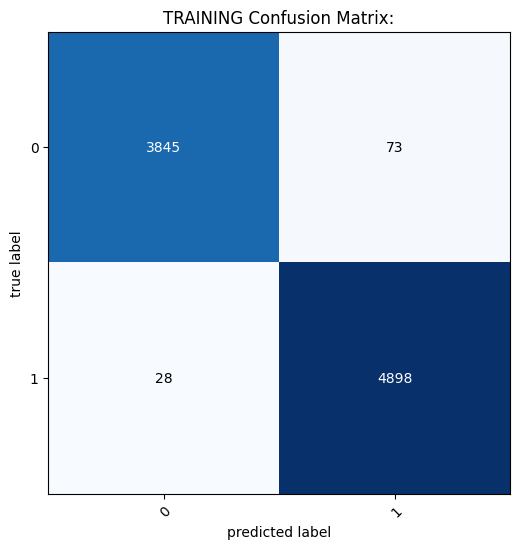

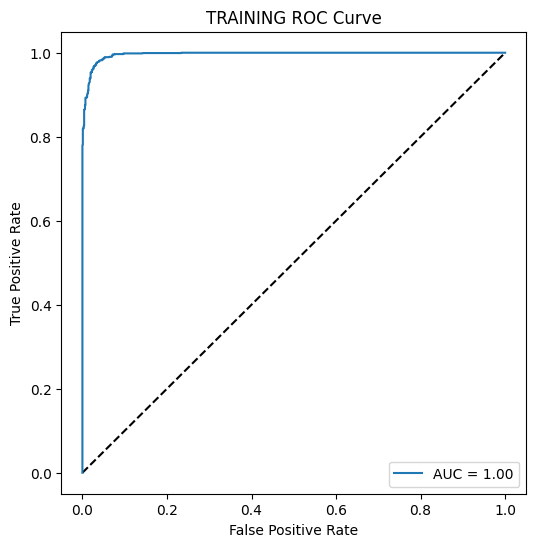


TESTING REPORT:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



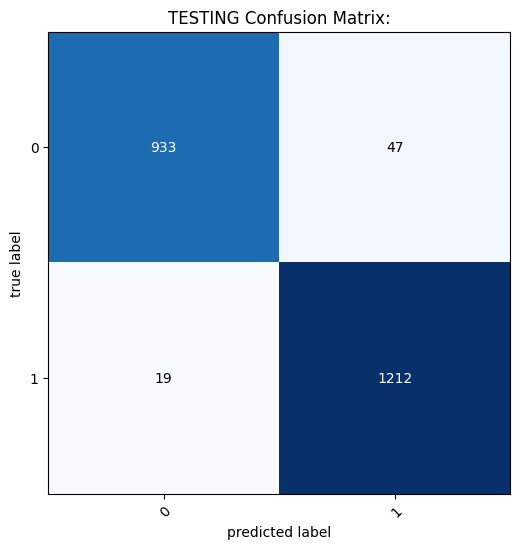

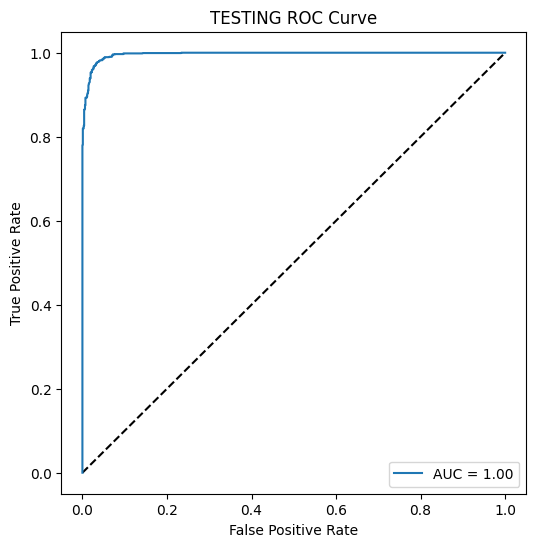

####################


In [27]:
# Defining the model with the best hyperparameters
model = XGBClassifier(
    random_state=10,
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    learning_rate=best_learning_rate,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    reg_alpha=best_reg_alpha,
    reg_lambda=best_reg_lambda,
    gamma=best_gamma,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define class labels (if not already defined)
class_labels = [0, 1]

# Print model evaluation report
print("#" * 20)
print("REPORT")
print("#" * 20)
get_report(X, Y, model)
print("#" * 20)
